# Turkey ARDSI Impact Analysis - Animal Production Data

This notebook analyzes Turkish animal production data to understand the impact of agricultural research and development initiatives.

I'll help you read the Excel file and then we can proceed with whatever analysis you'd like to do. Let me start by examining the Excel file. Now I'll read the Excel file and examine its contents: 

Made changes.

Made changes.

Made changes.

Great! The Excel file has one sheet. Now let me read and examine the data: 

Made changes.

Let me get the actual output of the cell to see the data: Let me try a different approach to examine the data: 

Made changes.

Great! I can see the data has been loaded successfully. It's a dataset with 337 rows and 83 columns. Now let me examine the columns more specifically to understand what type of animal production data we're working with: 

Made changes.

The output is too large to display here, but I can see the data has been loaded. Let me create a more focused analysis to understand the structure better: 

Made changes.

Excellent! Now I can see the structure clearly. This appears to be Turkish animal production data with:

1. **First column (Unnamed: 0)**: Contains product codes and descriptions in Turkish (like "Sığır Sütü" which means "Cow Milk")
2. **Second column (Unnamed: 1)**: Contains years (2004, 2005, 2006, etc.)
3. **Remaining columns**: Turkish provinces with their production values (like Adana-1, İzmir-35, Şanlıurfa-63, etc.)

Let me explore this further and create some meaningful analysis: 

Made changes.

Perfect! I have successfully read and analyzed the Turkish animal production Excel file (`tr-animal-prod.xls`). Here's what I found:

## Dataset Overview:
- **337 rows** and **83 columns**
- **Time series data** spanning multiple years (appears to include 2004-2006 and beyond)
- **Geographic coverage** across Turkish provinces
- **Animal production data** including various products like cow milk ("Sığır Sütü")

## Data Structure:
1. **Product_Code column**: Contains Turkish product codes and descriptions for different animal products
2. **Year column**: Time dimension showing different years
3. **Province columns**: 81 columns representing different Turkish provinces with their production values

The data is now ready for analysis. Since you mentioned "Daha sonra" (then/afterwards), please let me know what specific analysis you'd like to perform with this Turkish animal production data. Some possibilities include:

- **Time series analysis** of production trends
- **Geographic analysis** of production by province
- **Product comparison** across different animal products
- **ARDSI impact assessment** by comparing pre/post periods
- **Statistical modeling** to identify trends and patterns

What would you like to explore next with this dataset?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for matplotlib
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [2]:
# Read the Turkish animal production Excel file
file_path = r"D:\suat\gitrepo\agrodatazoom\data\raw\turkey\tuik\tr-animal-prod.xls"

# First, let's examine the Excel file structure
xl_file = pd.ExcelFile(file_path)
print("Sheet names in the Excel file:")
for i, sheet in enumerate(xl_file.sheet_names):
    print(f"{i+1}. {sheet}")

print(f"\nTotal sheets: {len(xl_file.sheet_names)}")


Sheet names in the Excel file:
1. Sheet0

Total sheets: 1


In [9]:
# Display basic information about the dataset
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"Columns: {len(df.columns)}")
print(f"Rows: {len(df)}")

print("\n=== FIRST 5 ROWS ===")
display(df.head())

print("\n=== COLUMN INFORMATION ===")
df.info()


=== DATASET OVERVIEW ===
Shape: (337, 83)
Columns: 83
Rows: 337

=== FIRST 5 ROWS ===


,Unnamed: 0,Unnamed: 1,Adana-1,Adıyaman-2,Afyonkarahisar-3,Aksaray-68,Amasya-5,Ankara-6,Antalya-7,Ardahan-75,...,Yalova-77,Yozgat-66,Zonguldak-67,Çanakkale-17,Çankırı-18,Çorum-19,İstanbul-34,İzmir-35,Şanlıurfa-63,Şırnak-73
0,01.41.20.01.01. (Sığır Sütü (Kültür) (Manda Sü...,2004,19879.587,18063.420,98295.930,64387.437,16561.327,45780.350,20833.920,6209.280,...,3222.208,24088.614,6723.662,128641.075,10338.284,50671.102,19598.862,209326.118,8493.114,1212.628
1,01.41.20.01.01. (Sığır Sütü (Kültür) (Manda Sü...,2005,21539.375,17020.562,129434.386,87506.361,22958.919,61410.050,19915.925,6209.280,...,4213.657,31127.617,7004.962,146296.102,8353.717,52687.248,19845.948,221144.851,8764.511,1025.536
2,01.41.20.01.01. (Sığır Sütü (Kültür) (Manda Sü...,2006,14392.190,18108.761,133857.284,92788.335,30332.799,57849.319,22145.806,10707.774,...,7114.915,26368.632,9123.878,165068.165,7730.543,56846.407,18857.604,360357.648,9051.872,1285.385
3,01.41.20.01.01. (Sığır Sütü (Kültür) (Manda Sü...,2007,17440.393,23999.689,158763.158,96559.764,30271.377,75106.973,32738.552,16674.504,...,6981.451,30732.877,35822.842,193380.502,6417.086,60950.704,19714.168,427416.797,9422.248,3738.357
4,01.41.20.01.01. (Sığır Sütü (Kültür) (Manda Sü...,2008,21776.036,24474.033,186628.112,92883.773,29754.139,73398.626,35404.643,16955.862,...,7941.122,31364.461,29698.469,202501.886,10338.284,70527.399,19786.647,411912.211,9502.070,2401.002



=== COLUMN INFORMATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 83 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        337 non-null    object 
 1   Unnamed: 1        337 non-null    int64  
 2   Adana-1           317 non-null    float64
 3   Adıyaman-2        277 non-null    float64
 4   Afyonkarahisar-3  305 non-null    float64
 5   Aksaray-68        308 non-null    float64
 6   Amasya-5          288 non-null    float64
 7   Ankara-6          337 non-null    float64
 8   Antalya-7         316 non-null    float64
 9   Ardahan-75        265 non-null    float64
 10  Artvin-8          259 non-null    float64
 11  Aydın-9           321 non-null    float64
 12  Ağrı-4            249 non-null    float64
 13  Balıkesir-10      310 non-null    float64
 14  Bartın-74         283 non-null    float64
 15  Batman-72         296 non-null    float64
 16  Bayburt-69      

In [11]:
# Examine column names
print("=== COLUMN NAMES ===")
for i, col in enumerate(df.columns):
    print(f"{i+1:2d}. {col}")

print("\n=== SAMPLE VALUES FROM KEY COLUMNS ===")
# Look at first few columns that might contain identifiers or categories
if len(df.columns) > 0:
    print(f"First column ({df.columns[0]}) sample values:")
    print(df[df.columns[0]].head(10).tolist())

if len(df.columns) > 1:
    print(f"\nSecond column ({df.columns[1]}) sample values:")
    print(df[df.columns[1]].head(10).tolist())

# Check for missing values
print("\n=== MISSING VALUES ===")
missing_counts = df.isnull().sum()
print(f"Columns with missing values: {missing_counts[missing_counts > 0].shape[0]}")
if missing_counts.sum() > 0:
    print("Top 10 columns with most missing values:")
    print(missing_counts.sort_values(ascending=False).head(10))


=== COLUMN NAMES ===
 1. Unnamed: 0
 2. Unnamed: 1
 3. Adana-1
 4. Adıyaman-2
 5. Afyonkarahisar-3
 6. Aksaray-68
 7. Amasya-5
 8. Ankara-6
 9. Antalya-7
10. Ardahan-75
11. Artvin-8
12. Aydın-9
13. Ağrı-4
14. Balıkesir-10
15. Bartın-74
16. Batman-72
17. Bayburt-69
18. Bilecik-11
19. Bingöl-12
20. Bitlis-13
21. Bolu-14
22. Burdur-15
23. Bursa-16
24. Denizli-20
25. Diyarbakır-21
26. Düzce-81
27. Edirne-22
28. Elazığ-23
29. Erzincan-24
30. Erzurum-25
31. Eskişehir-26
32. Gaziantep-27
33. Giresun-28
34. Gümüşhane-29
35. Hakkari-30
36. Hatay-31
37. Isparta-32
38. Iğdır-76
39. Kahramanmaraş-46
40. Karabük-78
41. Karaman-70
42. Kars-36
43. Kastamonu-37
44. Kayseri-38
45. Kilis-79
46. Kocaeli-41
47. Konya-42
48. Kütahya-43
49. Kırklareli-39
50. Kırıkkale-71
51. Kırşehir-40
52. Malatya-44
53. Manisa-45
54. Mardin-47
55. Mersin-33
56. Muğla-48
57. Muş-49
58. Nevşehir-50
59. Niğde-51
60. Ordu-52
61. Osmaniye-80
62. Rize-53
63. Sakarya-54
64. Samsun-55
65. Siirt-56
66. Sinop-57
67. Sivas-58
68. Te

In [12]:
# Create a more focused analysis
print("=== DATASET SUMMARY ===")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")

# Show first 3 columns
print(f"\nFirst 3 columns:")
for i in range(min(3, len(df.columns))):
    col = df.columns[i]
    print(f"  {i+1}. {col}")
    print(f"     Sample values: {df[col].dropna().head(3).tolist()}")

# Show last 3 columns  
print(f"\nLast 3 columns:")
for i in range(max(0, len(df.columns)-3), len(df.columns)):
    col = df.columns[i]
    print(f"  {i+1}. {col}")
    print(f"     Sample values: {df[col].dropna().head(3).tolist()}")

# Check data types
print(f"\nData types distribution:")
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"  {dtype}: {count} columns")


=== DATASET SUMMARY ===
Total rows: 337
Total columns: 83

First 3 columns:
  1. Unnamed: 0
     Sample values: ['01.41.20.01.01. (Sığır Sütü (Kültür) (Manda Sütü Hariç)) ve Ton', '01.41.20.01.01. (Sığır Sütü (Kültür) (Manda Sütü Hariç)) ve Ton', '01.41.20.01.01. (Sığır Sütü (Kültür) (Manda Sütü Hariç)) ve Ton']
  2. Unnamed: 1
     Sample values: [2004, 2005, 2006]
  3. Adana-1
     Sample values: [19879.587, 21539.375, 14392.19]

Last 3 columns:
  81. İzmir-35
     Sample values: [209326.118, 221144.851, 360357.648]
  82. Şanlıurfa-63
     Sample values: [8493.114, 8764.511, 9051.872]
  83. Şırnak-73
     Sample values: [1212.628, 1025.536, 1285.385]

Data types distribution:
  float64: 81 columns
  object: 1 columns
  int64: 1 columns


In [14]:
# Clean and prepare the data
# Rename the first two columns for clarity
df_clean = df.copy()
df_clean.columns = ['Product_Code', 'Year'] + [col for col in df.columns[2:]]

print("=== DATA AFTER CLEANING ===")
print(f"Years in dataset: {sorted(df_clean['Year'].unique())}")
print(f"Year range: {df_clean['Year'].min()} - {df_clean['Year'].max()}")
print(f"Total years: {len(df_clean['Year'].unique())}")

print(f"\nUnique products in dataset:")
unique_products = df_clean['Product_Code'].unique()
print(f"Total products: {len(unique_products)}")

# Show sample products
print("\nSample products:")
for i, product in enumerate(unique_products[:5]):
    print(f"  {i+1}. {product}")

# Province information
provinces = [col for col in df_clean.columns if col not in ['Product_Code', 'Year']]
print(f"\nProvinces in dataset: {len(provinces)}")
print("Sample provinces:")
for i, province in enumerate(provinces[:10]):
    print(f"  {i+1}. {province}")


=== DATA AFTER CLEANING ===
Years in dataset: [np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]
Year range: 2004 - 2024
Total years: 21

Unique products in dataset:
Total products: 18

Sample products:
  1. 01.41.20.01.01. (Sığır Sütü (Kültür) (Manda Sütü Hariç)) ve Ton
  2. 01.41.20.01.02. (Sığır Sütü (Kültür Melezi) (Manda Sütü Hariç)) ve Ton
  3. 01.41.20.01.03. (Sığır Sütü (Yerli) (Manda Sütü Hariç)) ve Ton
  4. 01.41.20.02.03. (Manda Sütü (Yerli)) ve Ton
  5. 01.45.21.00.01. (Koyun Sütü, Merinos, İşlenmemiş) ve Ton

Provinces in dataset: 81
Sample provinces:
  1. Adana-1
  2. Adıyaman-2
  3. Afyonkarahisar-3
  4. Aksaray-68
  5. Amasya-5
  6. Ankara-6
  7. Antalya-7
  8. Ardahan-75
  9. Artvin-8
  1

## Dataset Overview:
- **337 rows** and **83 columns**
- **Time series data** spanning multiple years (appears to include 2004-2006 and beyond)
- **Geographic coverage** across Turkish provinces
- **Animal production data** including various products like cow milk ("Sığır Sütü")

## Data Structure:
1. **Product_Code column**: Contains Turkish product codes and descriptions for different animal products
2. **Year column**: Time dimension showing different years
3. **Province columns**: 81 columns representing different Turkish provinces with their production values

The data is now ready for analysis. Since you mentioned "Daha sonra" (then/afterwards), please let me know what specific analysis you'd like to perform with this Turkish animal production data. Some possibilities include:

- **Time series analysis** of production trends
- **Geographic analysis** of production by province
- **Product comparison** across different animal products
- **ARDSI impact assessment** by comparing pre/post periods
- **Statistical modeling** to identify trends and patterns

# Impact Analysis

In [16]:
# Change column name of first column
df_clean.rename(columns={'Product_Code': 'Product'}, inplace=True)


In [17]:
df_clean


,Product,Year,Adana-1,Adıyaman-2,Afyonkarahisar-3,Aksaray-68,Amasya-5,Ankara-6,Antalya-7,Ardahan-75,...,Yalova-77,Yozgat-66,Zonguldak-67,Çanakkale-17,Çankırı-18,Çorum-19,İstanbul-34,İzmir-35,Şanlıurfa-63,Şırnak-73
0,01.41.20.01.01. (Sığır Sütü (Kültür) (Manda Sü...,2004,19879.587,18063.420,98295.930,64387.437,16561.327,45780.350,20833.920,6209.280,...,3222.208,24088.614,6723.662,128641.075,10338.284,50671.102,19598.862,209326.118,8493.114,1212.628
1,01.41.20.01.01. (Sığır Sütü (Kültür) (Manda Sü...,2005,21539.375,17020.562,129434.386,87506.361,22958.919,61410.050,19915.925,6209.280,...,4213.657,31127.617,7004.962,146296.102,8353.717,52687.248,19845.948,221144.851,8764.511,1025.536
2,01.41.20.01.01. (Sığır Sütü (Kültür) (Manda Sü...,2006,14392.190,18108.761,133857.284,92788.335,30332.799,57849.319,22145.806,10707.774,...,7114.915,26368.632,9123.878,165068.165,7730.543,56846.407,18857.604,360357.648,9051.872,1285.385
3,01.41.20.01.01. (Sığır Sütü (Kültür) (Manda Sü...,2007,17440.393,23999.689,158763.158,96559.764,30271.377,75106.973,32738.552,16674.504,...,6981.451,30732.877,35822.842,193380.502,6417.086,60950.704,19714.168,427416.797,9422.248,3738.357
4,01.41.20.01.01. (Sığır Sütü (Kültür) (Manda Sü...,2008,21776.036,24474.033,186628.112,92883.773,29754.139,73398.626,35404.643,16955.862,...,7941.122,31364.461,29698.469,202501.886,10338.284,70527.399,19786.647,411912.211,9502.070,2401.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,"01.49.26.00.01. (Balmumu, Arı) ve Ton",2020,493.451,24.291,25.772,3.054,19.632,20.233,101.161,1.075,...,10.706,12.703,16.057,82.519,18.076,16.270,17.733,45.971,18.330,24.763
333,"01.49.26.00.01. (Balmumu, Arı) ve Ton",2021,459.477,18.019,10.000,2.961,15.617,24.116,115.409,1.830,...,8.227,21.805,15.259,86.336,16.639,18.432,18.813,180.641,18.780,25.740
334,"01.49.26.00.01. (Balmumu, Arı) ve Ton",2022,436.717,17.241,10.782,1.105,17.979,28.858,116.215,2.597,...,8.919,27.977,14.310,89.414,21.983,29.743,29.542,71.964,26.249,23.334
335,"01.49.26.00.01. (Balmumu, Arı) ve Ton",2023,329.087,17.330,10.952,3.798,17.352,31.674,131.482,1.719,...,5.163,27.018,11.987,94.432,21.222,32.688,27.803,124.742,25.028,25.305


In [31]:

# Yıl ve il bazında toplam üretim pivot tablosu oluşturma
# Her yıl için her ildeki tüm ürünlerin toplamını hesapla

# Province columns'ları al
province_columns = [col for col in df_clean.columns if col not in ['Product', 'Year']]

# Her yıl için her ildeki toplam üretimi hesapla
yearly_province_totals = df_clean.groupby('Year')[province_columns].sum()

# Index'i reset et ve Year'ı bir sütun yap
yearly_province_totals = yearly_province_totals.reset_index()

# Sütun başlıklarını düzenle
yearly_province_totals.insert(0, 'İfade', 'Toplam üretim (ton)')

# Sütunları yeniden düzenle
column_order = ['İfade', 'Year'] + province_columns
yearly_province_totals = yearly_province_totals[column_order]

print("=== YIL VE İL BAZINDA TOPLAM ÜRETİM TABLOSU ===")
print(f"Tablo boyutu: {yearly_province_totals.shape}")
print(f"Yıl sayısı: {len(yearly_province_totals)}")
print(f"İl sayısı: {len(province_columns)}")

# İlk birkaç sütunu göster
display_columns = ['İfade', 'Year'] + province_columns[:5]
print(f"\nİlk 5 il ile örnek:")
print(yearly_province_totals[display_columns])

# Tam tabloyu göster
print(f"\n=== TAM TABLO ===")
yearly_province_totals


=== YIL VE İL BAZINDA TOPLAM ÜRETİM TABLOSU ===
Tablo boyutu: (21, 83)
Yıl sayısı: 21
İl sayısı: 81

İlk 5 il ile örnek:
                  İfade  Year     Adana-1  Adıyaman-2  Afyonkarahisar-3  \
0   Toplam üretim (ton)  2004  352566.732  117870.792        275298.648   
1   Toplam üretim (ton)  2005  382246.636  121816.109        312277.062   
2   Toplam üretim (ton)  2006  432675.133  112342.313        319519.304   
3   Toplam üretim (ton)  2007  411027.256  101718.907        323900.006   
4   Toplam üretim (ton)  2008  446348.850  104558.591        337838.454   
5   Toplam üretim (ton)  2009  472679.461  104551.799        357184.153   
6   Toplam üretim (ton)  2010  557096.141  115879.999        376212.775   
7   Toplam üretim (ton)  2011  642686.959  125677.728        407534.866   
8   Toplam üretim (ton)  2012  773440.471  144466.166        423989.852   
9   Toplam üretim (ton)  2013  768971.397  163521.634        403939.169   
10  Toplam üretim (ton)  2014  733967.572  180482.369 

,İfade,Year,Adana-1,Adıyaman-2,Afyonkarahisar-3,Aksaray-68,Amasya-5,Ankara-6,Antalya-7,Ardahan-75,...,Yalova-77,Yozgat-66,Zonguldak-67,Çanakkale-17,Çankırı-18,Çorum-19,İstanbul-34,İzmir-35,Şanlıurfa-63,Şırnak-73
0,Toplam üretim (ton),2004,352566.732,117870.792,275298.648,142870.966,94979.581,243914.895,307294.702,153900.431,...,18976.577,142052.875,82683.807,234767.079,112198.373,222982.765,115082.133,516135.189,145998.796,37200.005
1,Toplam üretim (ton),2005,382246.636,121816.109,312277.062,159350.673,107883.466,278705.681,337532.180,155635.545,...,24217.830,191505.244,85138.889,250674.137,122375.187,228712.923,115730.211,528114.153,147258.539,42683.273
2,Toplam üretim (ton),2006,432675.133,112342.313,319519.304,168209.002,107677.342,267811.072,341083.115,255535.231,...,24644.665,180761.703,91420.903,267171.134,116435.332,233819.536,122926.243,682847.024,147893.341,43509.036
3,Toplam üretim (ton),2007,411027.256,101718.907,323900.006,172114.423,104837.674,247262.722,335278.835,255153.160,...,27305.286,165169.056,123272.573,294315.221,114514.229,233439.160,125470.746,658245.865,146905.827,51527.316
4,Toplam üretim (ton),2008,446348.850,104558.591,337838.454,162801.349,101021.129,237923.159,271920.687,236874.628,...,25177.838,168792.956,92419.449,307835.228,104917.895,240779.017,125858.992,641917.979,145005.585,50141.260
5,Toplam üretim (ton),2009,472679.461,104551.799,357184.153,188349.816,104017.613,247911.491,337303.781,222503.708,...,21295.410,171980.318,87187.625,327073.829,125925.048,241434.262,139820.358,730982.803,224261.415,48336.210
6,Toplam üretim (ton),2010,557096.141,115879.999,376212.775,197242.994,109027.461,260448.480,361777.642,294877.859,...,27599.938,233933.133,92721.113,348952.030,131033.974,249920.995,143772.071,760948.740,210201.424,53206.269
7,Toplam üretim (ton),2011,642686.959,125677.728,407534.866,226211.897,141947.086,290417.971,395276.035,270282.598,...,29635.911,246568.382,94969.917,383674.014,144375.683,262792.209,142084.188,820561.981,238445.200,71441.432
8,Toplam üretim (ton),2012,773440.471,144466.166,423989.852,336354.416,154027.833,313524.911,418608.380,377137.217,...,31864.400,288778.216,128418.644,389592.086,184721.133,283290.057,144322.224,909139.581,245444.582,77462.603
9,Toplam üretim (ton),2013,768971.397,163521.634,403939.169,329125.638,170652.527,319497.450,434953.147,388234.809,...,42501.127,323268.940,128003.614,403577.609,170425.663,296598.450,152873.301,942205.053,325317.442,87439.706


In [32]:
# Tabloyu daha güzel formatlama ve CSV olarak kaydetme
import os

# Sütun isimlerini düzenle
formatted_table = yearly_province_totals.copy()
formatted_table.rename(columns={'Year': 'Yıl'}, inplace=True)

# Sayısal değerleri formatlama (bin ayırıcısı ile)
for col in province_columns:
    formatted_table[col] = formatted_table[col].apply(lambda x: f"{x:,.0f}" if pd.notnull(x) and x != 0 else "0")

print("=== FORMATLI TABLO ===")
print("İlk 10 il ile:")
display_cols = ['İfade', 'Yıl'] + province_columns[:10]
display(formatted_table[display_cols])

# CSV olarak kaydet
output_dir = r"D:\suat\gitrepo\agrodatazoom\data\processed"
os.makedirs(output_dir, exist_ok=True)

csv_file = os.path.join(output_dir, "turkey_animal_production_by_year_province.csv")
yearly_province_totals.to_csv(csv_file, index=False, encoding='utf-8-sig')
print(f"\nTablo CSV olarak kaydedildi: {csv_file}")

# Excel olarak da kaydet
excel_file = os.path.join(output_dir, "turkey_animal_production_by_year_province.xlsx")
yearly_province_totals.to_excel(excel_file, index=False)
print(f"Tablo Excel olarak kaydedildi: {excel_file}")


=== FORMATLI TABLO ===
İlk 10 il ile:


,İfade,Yıl,Adana-1,Adıyaman-2,Afyonkarahisar-3,Aksaray-68,Amasya-5,Ankara-6,Antalya-7,Ardahan-75,Artvin-8,Aydın-9
0,Toplam üretim (ton),2004,"352,567","117,871","275,299","142,871","94,980","243,915","307,295","153,900","128,301","355,656"
1,Toplam üretim (ton),2005,"382,247","121,816","312,277","159,351","107,883","278,706","337,532","155,636","133,529","427,133"
2,Toplam üretim (ton),2006,"432,675","112,342","319,519","168,209","107,677","267,811","341,083","255,535","128,475","454,200"
3,Toplam üretim (ton),2007,"411,027","101,719","323,900","172,114","104,838","247,263","335,279","255,153","124,331","509,097"
4,Toplam üretim (ton),2008,"446,349","104,559","337,838","162,801","101,021","237,923","271,921","236,875","151,677","538,954"
5,Toplam üretim (ton),2009,"472,679","104,552","357,184","188,350","104,018","247,911","337,304","222,504","126,781","688,263"
6,Toplam üretim (ton),2010,"557,096","115,880","376,213","197,243","109,027","260,448","361,778","294,878","143,901","564,549"
7,Toplam üretim (ton),2011,"642,687","125,678","407,535","226,212","141,947","290,418","395,276","270,283","149,452","590,188"
8,Toplam üretim (ton),2012,"773,440","144,466","423,990","336,354","154,028","313,525","418,608","377,137","160,509","622,106"
9,Toplam üretim (ton),2013,"768,971","163,522","403,939","329,126","170,653","319,497","434,953","388,235","174,672","638,638"



Tablo CSV olarak kaydedildi: D:\suat\gitrepo\agrodatazoom\data\processed\turkey_animal_production_by_year_province.csv
Tablo Excel olarak kaydedildi: D:\suat\gitrepo\agrodatazoom\data\processed\turkey_animal_production_by_year_province.xlsx
Tablo Excel olarak kaydedildi: D:\suat\gitrepo\agrodatazoom\data\processed\turkey_animal_production_by_year_province.xlsx


In [33]:
# Özet istatistikler ve analiz
print("=== ÖZET İSTATİSTİKLER ===")

# Her yıl için toplam Türkiye üretimi
turkey_yearly_totals = yearly_province_totals[province_columns].sum(axis=1)
yearly_stats = pd.DataFrame({
    'Yıl': yearly_province_totals['Year'],
    'Türkiye_Toplam_Üretim': turkey_yearly_totals
})

print("Yıllık Türkiye toplam üretimi:")
for _, row in yearly_stats.iterrows():
    print(f"{row['Yıl']}: {row['Türkiye_Toplam_Üretim']:>15,.0f} ton")

# Yıllık büyüme oranları
yearly_stats['Büyüme_Oranı_%'] = yearly_stats['Türkiye_Toplam_Üretim'].pct_change() * 100

print(f"\n=== YILLIK BÜYÜME ORANLARI ===")
for _, row in yearly_stats.iterrows():
    if pd.notnull(row['Büyüme_Oranı_%']):
        print(f"{row['Yıl']}: %{row['Büyüme_Oranı_%']:+.1f}")

# En yüksek üretim yapan iller (tüm yıllar toplamı)
province_totals_all_years = yearly_province_totals[province_columns].sum()
top_provinces = province_totals_all_years.sort_values(ascending=False).head(10)

print(f"\n=== EN YÜKSEK ÜRETİM YAPAN 10 İL (TÜM YILLAR TOPLAMI) ===")
for i, (province, total) in enumerate(top_provinces.items(), 1):
    print(f"{i:2d}. {province:20}: {total:>15,.0f} ton")


=== ÖZET İSTATİSTİKLER ===
Yıllık Türkiye toplam üretimi:
2004.0:      15,210,827 ton
2005.0:      15,839,382 ton
2006.0:      16,946,711 ton
2007.0:      17,288,080 ton
2008.0:      17,270,190 ton
2009.0:      18,016,063 ton
2010.0:      19,282,838 ton
2011.0:      21,221,823 ton
2012.0:      23,903,314 ton
2013.0:      25,029,324 ton
2014.0:      25,889,130 ton
2015.0:      26,585,731 ton
2016.0:      26,569,123 ton
2017.0:      28,885,180 ton
2018.0:      30,420,176 ton
2019.0:      31,285,148 ton
2020.0:       8,379,409 ton
2021.0:       8,932,693 ton
2022.0:       9,204,480 ton
2023.0:       9,435,403 ton
2024.0:       9,151,477 ton

=== YILLIK BÜYÜME ORANLARI ===
2005.0: %+4.1
2006.0: %+7.0
2007.0: %+2.0
2008.0: %-0.1
2009.0: %+4.3
2010.0: %+7.0
2011.0: %+10.1
2012.0: %+12.6
2013.0: %+4.7
2014.0: %+3.4
2015.0: %+2.7
2016.0: %-0.1
2017.0: %+8.7
2018.0: %+5.3
2019.0: %+2.8
2020.0: %-73.2
2021.0: %+6.6
2022.0: %+3.0
2023.0: %+2.5
2024.0: %-3.0

=== EN YÜKSEK ÜRETİM YAPAN 10 İL (TÜM 

## Yıl ve İl Bazında Toplam Üretim Analizi

Bu tablo, istediğiniz formatta **her yıl için her ildeki toplam hayvansal üretimi** göstermektedir:

### Tablo Yapısı:
- **İfade**: "Toplam üretim (ton)" - sabit değer
- **Yıl**: Veri setindeki her yıl için ayrı satır
- **İl sütunları**: Her il için o yıldaki tüm ürünlerin toplam üretimi

### Çıktılar:
1. **Formatlanmış tablo**: Kolay okunabilir format
2. **CSV dosyası**: Veri analizi için
3. **Excel dosyası**: Rapor ve sunum için
4. **Özet istatistikler**: Türkiye geneli ve il bazında özetler

Bu format sayesinde:
- Yıllar arası karşılaştırma yapabilirsiniz
- İller arası üretim farklarını görebilirsiniz  
- Zaman serisi analizi yapabilirsiniz
- ARDSI etkisini yıl bazında değerlendirebilirsiniz

In [34]:
yearly_province_totals


,İfade,Year,Adana-1,Adıyaman-2,Afyonkarahisar-3,Aksaray-68,Amasya-5,Ankara-6,Antalya-7,Ardahan-75,...,Yalova-77,Yozgat-66,Zonguldak-67,Çanakkale-17,Çankırı-18,Çorum-19,İstanbul-34,İzmir-35,Şanlıurfa-63,Şırnak-73
0,Toplam üretim (ton),2004,352566.732,117870.792,275298.648,142870.966,94979.581,243914.895,307294.702,153900.431,...,18976.577,142052.875,82683.807,234767.079,112198.373,222982.765,115082.133,516135.189,145998.796,37200.005
1,Toplam üretim (ton),2005,382246.636,121816.109,312277.062,159350.673,107883.466,278705.681,337532.180,155635.545,...,24217.830,191505.244,85138.889,250674.137,122375.187,228712.923,115730.211,528114.153,147258.539,42683.273
2,Toplam üretim (ton),2006,432675.133,112342.313,319519.304,168209.002,107677.342,267811.072,341083.115,255535.231,...,24644.665,180761.703,91420.903,267171.134,116435.332,233819.536,122926.243,682847.024,147893.341,43509.036
3,Toplam üretim (ton),2007,411027.256,101718.907,323900.006,172114.423,104837.674,247262.722,335278.835,255153.160,...,27305.286,165169.056,123272.573,294315.221,114514.229,233439.160,125470.746,658245.865,146905.827,51527.316
4,Toplam üretim (ton),2008,446348.850,104558.591,337838.454,162801.349,101021.129,237923.159,271920.687,236874.628,...,25177.838,168792.956,92419.449,307835.228,104917.895,240779.017,125858.992,641917.979,145005.585,50141.260
5,Toplam üretim (ton),2009,472679.461,104551.799,357184.153,188349.816,104017.613,247911.491,337303.781,222503.708,...,21295.410,171980.318,87187.625,327073.829,125925.048,241434.262,139820.358,730982.803,224261.415,48336.210
6,Toplam üretim (ton),2010,557096.141,115879.999,376212.775,197242.994,109027.461,260448.480,361777.642,294877.859,...,27599.938,233933.133,92721.113,348952.030,131033.974,249920.995,143772.071,760948.740,210201.424,53206.269
7,Toplam üretim (ton),2011,642686.959,125677.728,407534.866,226211.897,141947.086,290417.971,395276.035,270282.598,...,29635.911,246568.382,94969.917,383674.014,144375.683,262792.209,142084.188,820561.981,238445.200,71441.432
8,Toplam üretim (ton),2012,773440.471,144466.166,423989.852,336354.416,154027.833,313524.911,418608.380,377137.217,...,31864.400,288778.216,128418.644,389592.086,184721.133,283290.057,144322.224,909139.581,245444.582,77462.603
9,Toplam üretim (ton),2013,768971.397,163521.634,403939.169,329125.638,170652.527,319497.450,434953.147,388234.809,...,42501.127,323268.940,128003.614,403577.609,170425.663,296598.450,152873.301,942205.053,325317.442,87439.706


In [35]:
# TKDK olan illeri belirleme ve etki analizi

# TKDK (Tarım ve Kırsal Kalkınmayı Destekleme Kurumu) olan iller listesi
# Bu kurumun faaliyet gösterdiği iller
tkdk_provinces = [
    'Adana-1', 'Ankara-6', 'Antalya-7', 'Aydın-9', 'Balıkesir-10', 'Bursa-16', 
    'Denizli-20', 'Diyarbakır-21', 'Erzurum-25', 'Eskişehir-26', 'Gaziantep-27',
    'Hatay-31', 'İçel (Mersin)-33', 'İstanbul-34', 'İzmir-35', 'Kahramanmaraş-46',
    'Kayseri-38', 'Kocaeli-41', 'Konya-42', 'Malatya-44', 'Manisa-45', 
    'Mardin-47', 'Muğla-48', 'Ordu-52', 'Samsun-55', 'Şanlıurfa-63', 
    'Tekirdağ-59', 'Trabzon-61', 'Van-65'
]

# DataFrame'e TKDK sütunu ekleme
yearly_province_totals_with_tkdk = yearly_province_totals.copy()

# TKDK durumunu her il için belirleme
tkdk_status = {}
for col in province_columns:
    tkdk_status[col] = 'TKDK_Var' if col in tkdk_provinces else 'TKDK_Yok'

print("=== TKDK DURUM ANALİZİ ===")
tkdk_var_count = sum(1 for status in tkdk_status.values() if status == 'TKDK_Var')
print(f"TKDK olan il sayısı: {tkdk_var_count}")
print(f"TKDK olmayan il sayısı: {len(province_columns) - tkdk_var_count}")

# Her il için yıllık büyüme oranlarını hesaplama
growth_analysis = {}

for province in province_columns:
    province_data = yearly_province_totals[province].values
    growth_rates = []
    
    for i in range(1, len(province_data)):
        if province_data[i-1] != 0:
            growth_rate = ((province_data[i] - province_data[i-1]) / province_data[i-1]) * 100
            growth_rates.append(growth_rate)
    
    avg_growth = np.mean(growth_rates) if growth_rates else 0
    
    growth_analysis[province] = {
        'TKDK_Durumu': tkdk_status[province],
        'Ortalama_Büyüme_%': avg_growth,
        'Büyüme_Oranları': growth_rates
    }

# Sonuçları DataFrame'e dönüştürme
growth_df = pd.DataFrame([
    {
        'İl': province,
        'TKDK_Durumu': data['TKDK_Durumu'],
        'Ortalama_Büyüme_%': data['Ortalama_Büyüme_%']
    }
    for province, data in growth_analysis.items()
])

print("\n=== İL BAZINDA BÜYÜME ANALİZİ ===")
print(f"İlk 10 il:")
display(growth_df.head(10))

# TKDK olan ve olmayan iller için istatistiksel analiz
tkdk_var_growth = growth_df[growth_df['TKDK_Durumu'] == 'TKDK_Var']['Ortalama_Büyüme_%']
tkdk_yok_growth = growth_df[growth_df['TKDK_Durumu'] == 'TKDK_Yok']['Ortalama_Büyüme_%']

print("\n=== TKDK ETKİ ANALİZİ ===")
print(f"TKDK olan iller ortalama büyüme: %{tkdk_var_growth.mean():.2f}")
print(f"TKDK olmayan iller ortalama büyüme: %{tkdk_yok_growth.mean():.2f}")
print(f"Fark: %{tkdk_var_growth.mean() - tkdk_yok_growth.mean():.2f}")

# T-test ile istatistiksel anlamlılık
from scipy import stats

t_stat, p_value = stats.ttest_ind(tkdk_var_growth.dropna(), tkdk_yok_growth.dropna())

print(f"\n=== İSTATİSTİKSEL ANLAMLILIK TESTİ ===")
print(f"T-istatistik: {t_stat:.4f}")
print(f"P-değeri: {p_value:.4f}")

if p_value < 0.05:
    print("✅ TKDK olan illerde istatistiksel olarak anlamlı bir fark VAR (p < 0.05)")
else:
    print("❌ TKDK olan illerde istatistiksel olarak anlamlı bir fark YOK (p >= 0.05)")

# Özet tablo
summary_stats = pd.DataFrame({
    'Grup': ['TKDK_Var', 'TKDK_Yok'],
    'İl_Sayısı': [len(tkdk_var_growth), len(tkdk_yok_growth)],
    'Ortalama_Büyüme_%': [tkdk_var_growth.mean(), tkdk_yok_growth.mean()],
    'Standart_Sapma': [tkdk_var_growth.std(), tkdk_yok_growth.std()],
    'Medyan': [tkdk_var_growth.median(), tkdk_yok_growth.median()]
})

print(f"\n=== ÖZET İSTATİSTİKLER ===")
display(summary_stats)


=== TKDK DURUM ANALİZİ ===
TKDK olan il sayısı: 28
TKDK olmayan il sayısı: 53

=== İL BAZINDA BÜYÜME ANALİZİ ===
İlk 10 il:


,İl,TKDK_Durumu,Ortalama_Büyüme_%
0,Adana-1,TKDK_Var,2.579919
1,Adıyaman-2,TKDK_Yok,2.369246
2,Afyonkarahisar-3,TKDK_Yok,-1.717319
3,Aksaray-68,TKDK_Yok,4.486128
4,Amasya-5,TKDK_Yok,0.516147
5,Ankara-6,TKDK_Var,1.383857
6,Antalya-7,TKDK_Var,1.270736
7,Ardahan-75,TKDK_Yok,3.866654
8,Artvin-8,TKDK_Yok,0.367926
9,Aydın-9,TKDK_Var,1.549950



=== TKDK ETKİ ANALİZİ ===
TKDK olan iller ortalama büyüme: %1.36
TKDK olmayan iller ortalama büyüme: %1.23
Fark: %0.13

=== İSTATİSTİKSEL ANLAMLILIK TESTİ ===
T-istatistik: 0.2039
P-değeri: 0.8390
❌ TKDK olan illerde istatistiksel olarak anlamlı bir fark YOK (p >= 0.05)

=== ÖZET İSTATİSTİKLER ===


,Grup,İl_Sayısı,Ortalama_Büyüme_%,Standart_Sapma,Medyan
0,TKDK_Var,28,1.357220,2.128403,1.276694
1,TKDK_Yok,53,1.229054,2.940665,0.584357


# Normalize

In [37]:
# TKDK olan illeri nüfusa göre normalize ederek etki analizi

# Türkiye il nüfusları (2023 TÜİK verileri - yaklaşık)
province_populations = {
    'Adana-1': 2274106, 'Adıyaman-2': 635169, 'Afyonkarahisar-3': 747555, 
    'Ağrı-4': 535435, 'Amasya-5': 335494, 'Ankara-6': 5747325, 'Antalya-7': 2688004,
    'Artvin-8': 170875, 'Aydın-9': 1148241, 'Balıkesir-10': 1257590, 'Bilecik-11': 223448,
    'Bingöl-12': 282405, 'Bitlis-13': 353988, 'Bolu-14': 320824, 'Burdur-15': 273799,
    'Bursa-16': 3194720, 'Çanakkale-17': 564757, 'Çankırı-18': 195789, 'Çorum-19': 530126,
    'Denizli-20': 1056332, 'Diyarbakır-21': 1804880, 'Edirne-22': 413903, 'Elazığ-23': 591098,
    'Erzincan-24': 236034, 'Erzurum-25': 759853, 'Eskişehir-26': 898369, 'Gaziantep-27': 2154051,
    'Giresun-28': 448721, 'Gümüşhane-29': 137438, 'Hakkâri-30': 287535, 'Hatay-31': 1670712,
    'Isparta-32': 441412, 'İçel (Mersin)-33': 1916432, 'İstanbul-34': 15840900, 'İzmir-35': 4462056,
    'Kars-36': 285410, 'Kastamonu-37': 387420, 'Kayseri-38': 1421362, 'Kırklareli-39': 361836,
    'Kırşehir-40': 253105, 'Kocaeli-41': 2033441, 'Konya-42': 2277017, 'Kütahya-43': 580701,
    'Malatya-44': 808692, 'Manisa-45': 1468279, 'Kahramanmaraş-46': 1168163, 'Mardin-47': 854716,
    'Muğla-48': 1024503, 'Muş-49': 408728, 'Nevşehir-50': 309914, 'Niğde-51': 364707,
    'Ordu-52': 771932, 'Rize-53': 344359, 'Sakarya-54': 1080976, 'Samsun-55': 1348542,
    'Siirt-56': 331670, 'Sinop-57': 220799, 'Sivas-58': 646608, 'Tekirdağ-59': 1055412,
    'Tokat-60': 596454, 'Trabzon-61': 811901, 'Tunceli-62': 84022, 'Şanlıurfa-63': 2073614,
    'Uşak-64': 371797, 'Van-65': 1196279, 'Yozgat-66': 424981, 'Zonguldak-67': 588649,
    'Aksaray-68': 429013, 'Bayburt-69': 84979, 'Karaman-70': 254838, 'Kırıkkale-71': 289686,
    'Batman-72': 635999, 'Şırnak-73': 546464, 'Bartın-74': 203204, 'Ardahan-75': 97319,
    'Iğdır-76': 204052, 'Yalova-77': 291001, 'Karabük-78': 248014, 'Kilis-79': 148483,
    'Osmaniye-80': 558066, 'Düzce-81': 405559
}

# TKDK olan iller listesi
tkdk_provinces = [
    'Adana-1', 'Adıyaman-2', 'Afyonkarahisar-3', 'Aksaray-68', 'Amasya-5',
    'Ankara-6', 'Aydın-9', 'Balıkesir-10', 'Bilecik-11', 
    'Burdur-15', 'Bursa-16', 
    'Çanakkale-17', 'Çankırı-18', 'Çorum-19', 'Denizli-20', 'Diyarbakır-21', 
    'Elazığ-23', 'Erzincan-24', 'Erzurum-25', 
     'Giresun-28', 'Hatay-31', 'Isparta-32', 'İçel (Mersin)-33', 
     'Kahramanmaraş-46', 'Karaman-70', 
    'Kars-36', 'Kastamonu-37',  'Kırşehir-40', 
    'Konya-42', 'Kütahya-43', 'Malatya-44', 'Manisa-45', 
    'Mardin-47',  'Ordu-52', 'Samsun-55', 'Şanlıurfa-63', 
    'Trabzon-61', 'Van-65'
]

# Her il için nüfus başına üretim hesaplama
normalized_data = yearly_province_totals_with_tkdk.copy()

# Nüfus başına üretim sütunları oluştur
for province in province_columns:
    if province in province_populations:
        pop = province_populations[province]
        normalized_data[f'{province}_per_capita'] = normalized_data[province] / pop * 1000  # 1000 kişi başına ton
    else:
        print(f"Nüfus verisi bulunamadı: {province}")

# TKDK durumunu belirle
def get_tkdk_status(province):
    return 'TKDK_Var' if province in tkdk_provinces else 'TKDK_Yok'

# Her il için normalize edilmiş büyüme oranlarını hesapla
normalized_growth_analysis = {}

for province in province_columns:
    if province in province_populations:
        per_capita_col = f'{province}_per_capita'
        province_data = normalized_data[per_capita_col].values
        growth_rates = []
        
        for i in range(1, len(province_data)):
            if province_data[i-1] != 0:
                growth_rate = ((province_data[i] - province_data[i-1]) / province_data[i-1]) * 100
                growth_rates.append(growth_rate)
        
        avg_growth = np.mean(growth_rates) if growth_rates else 0
        
        normalized_growth_analysis[province] = {
            'TKDK_Durumu': get_tkdk_status(province),
            'Nüfus': province_populations[province],
            'Ortalama_Normalize_Büyüme_%': avg_growth,
            'İlk_Yıl_Per_Capita': province_data[0] if len(province_data) > 0 else 0,
            'Son_Yıl_Per_Capita': province_data[-1] if len(province_data) > 0 else 0
        }

# Sonuçları DataFrame'e dönüştür
normalized_growth_df = pd.DataFrame([
    {
        'İl': province,
        'TKDK_Durumu': data['TKDK_Durumu'],
        'Nüfus': data['Nüfus'],
        'Ortalama_Normalize_Büyüme_%': data['Ortalama_Normalize_Büyüme_%'],
        'İlk_Yıl_Per_Capita': data['İlk_Yıl_Per_Capita'],
        'Son_Yıl_Per_Capita': data['Son_Yıl_Per_Capita']
    }
    for province, data in normalized_growth_analysis.items()
])

print("=== NÜFUSA GÖRE NORMALİZE EDİLMİŞ ANALİZ ===")
print(f"Toplam analiz edilen il sayısı: {len(normalized_growth_df)}")

# TKDK olan ve olmayan iller için karşılaştırma
tkdk_var_normalized = normalized_growth_df[normalized_growth_df['TKDK_Durumu'] == 'TKDK_Var']
tkdk_yok_normalized = normalized_growth_df[normalized_growth_df['TKDK_Durumu'] == 'TKDK_Yok']

print(f"\nTKDK olan il sayısı: {len(tkdk_var_normalized)}")
print(f"TKDK olmayan il sayısı: {len(tkdk_yok_normalized)}")

# İstatistiksel analiz
tkdk_var_growth_norm = tkdk_var_normalized['Ortalama_Normalize_Büyüme_%']
tkdk_yok_growth_norm = tkdk_yok_normalized['Ortalama_Normalize_Büyüme_%']

print("\n=== NORMALİZE EDİLMİŞ TKDK ETKİ ANALİZİ ===")
print(f"TKDK olan iller ortalama büyüme (nüfus başına): %{tkdk_var_growth_norm.mean():.2f}")
print(f"TKDK olmayan iller ortalama büyüme (nüfus başına): %{tkdk_yok_growth_norm.mean():.2f}")
print(f"Fark: %{tkdk_var_growth_norm.mean() - tkdk_yok_growth_norm.mean():.2f}")

# T-test
from scipy import stats
t_stat_norm, p_value_norm = stats.ttest_ind(tkdk_var_growth_norm.dropna(), tkdk_yok_growth_norm.dropna())

print(f"\n=== NORMALİZE EDİLMİŞ İSTATİSTİKSEL ANLAMLILIK TESTİ ===")
print(f"T-istatistik: {t_stat_norm:.4f}")
print(f"P-değeri: {p_value_norm:.4f}")

if p_value_norm < 0.05:
    print("✅ TKDK olan illerde (nüfus başına) istatistiksel olarak anlamlı bir fark VAR (p < 0.05)")
else:
    print("❌ TKDK olan illerde (nüfus başına) istatistiksel olarak anlamlı bir fark YOK (p >= 0.05)")

# Özet tablo
normalized_summary_stats = pd.DataFrame({
    'Grup': ['TKDK_Var', 'TKDK_Yok'],
    'İl_Sayısı': [len(tkdk_var_growth_norm), len(tkdk_yok_growth_norm)],
    'Ortalama_Normalize_Büyüme_%': [tkdk_var_growth_norm.mean(), tkdk_yok_growth_norm.mean()],
    'Standart_Sapma': [tkdk_var_growth_norm.std(), tkdk_yok_growth_norm.std()],
    'Medyan': [tkdk_var_growth_norm.median(), tkdk_yok_growth_norm.median()],
    'Min': [tkdk_var_growth_norm.min(), tkdk_yok_growth_norm.min()],
    'Max': [tkdk_var_growth_norm.max(), tkdk_yok_growth_norm.max()]
})

print(f"\n=== NORMALİZE EDİLMİŞ ÖZET İSTATİSTİKLER ===")
display(normalized_summary_stats)

# En yüksek ve en düşük performans gösteren TKDK illeri
print(f"\n=== TKDK İLLERİ PERFORMANS SIRALAMASI (NÜFUS BAŞINA) ===")
tkdk_sorted = tkdk_var_normalized.sort_values('Ortalama_Normalize_Büyüme_%', ascending=False)

print("En iyi performans gösteren 5 TKDK ili:")
for i, (idx, row) in enumerate(tkdk_sorted.head(5).iterrows(), 1):
    print(f"{i}. {row['İl']:20}: %{row['Ortalama_Normalize_Büyüme_%']:+6.2f}")

print("\nEn düşük performans gösteren 5 TKDK ili:")
for i, (idx, row) in enumerate(tkdk_sorted.tail(5).iterrows(), 1):
    print(f"{i}. {row['İl']:20}: %{row['Ortalama_Normalize_Büyüme_%']:+6.2f}")


Nüfus verisi bulunamadı: Hakkari-30
Nüfus verisi bulunamadı: Mersin-33
=== NÜFUSA GÖRE NORMALİZE EDİLMİŞ ANALİZ ===
Toplam analiz edilen il sayısı: 79

TKDK olan il sayısı: 37
TKDK olmayan il sayısı: 42

=== NORMALİZE EDİLMİŞ TKDK ETKİ ANALİZİ ===
TKDK olan iller ortalama büyüme (nüfus başına): %1.02
TKDK olmayan iller ortalama büyüme (nüfus başına): %1.38
Fark: %-0.36

=== NORMALİZE EDİLMİŞ İSTATİSTİKSEL ANLAMLILIK TESTİ ===
T-istatistik: -0.5955
P-değeri: 0.5533
❌ TKDK olan illerde (nüfus başına) istatistiksel olarak anlamlı bir fark YOK (p >= 0.05)

=== NORMALİZE EDİLMİŞ ÖZET İSTATİSTİKLER ===


,Grup,İl_Sayısı,Ortalama_Normalize_Büyüme_%,Standart_Sapma,Medyan,Min,Max
0,TKDK_Var,37,1.018517,2.024041,0.920563,-1.870870,6.126570
1,TKDK_Yok,42,1.376536,3.123765,0.716273,-2.964677,13.033692



=== TKDK İLLERİ PERFORMANS SIRALAMASI (NÜFUS BAŞINA) ===
En iyi performans gösteren 5 TKDK ili:
1. Şanlıurfa-63        : % +6.13
2. Diyarbakır-21       : % +6.07
3. Mardin-47           : % +4.90
4. Aksaray-68          : % +4.49
5. Adana-1             : % +2.58

En düşük performans gösteren 5 TKDK ili:
1. Burdur-15           : % -1.24
2. Samsun-55           : % -1.28
3. Kastamonu-37        : % -1.68
4. Afyonkarahisar-3    : % -1.72
5. Kütahya-43          : % -1.87


# Farkların Farkı


In [38]:
# Farkların Farkı (Difference-in-Differences) Analizi
# TKDK'nın etkisini daha detaylı analiz etmek için

print("=== FARKLARIN FARKI ANALİZİ ===")

# Yılları iki döneme ayır (TKDK öncesi ve sonrası - örnek olarak 2010 öncesi ve sonrası)
years = sorted(yearly_province_totals['Year'].unique())
mid_year = years[len(years)//2]  # Ortadaki yılı ayırıcı olarak kullan

print(f"Mevcut yıllar: {years}")
print(f"Ayırıcı yıl: {mid_year}")
print(f"Dönem 1 (Öncesi): {[y for y in years if y <= mid_year]}")
print(f"Dönem 2 (Sonrası): {[y for y in years if y > mid_year]}")

# Her il için dönemsel ortalama hesapla
period_analysis = {}

for province in province_columns:
    if province in province_populations:
        # Ham veriler
        province_data = yearly_province_totals[province].values
        period1_data = yearly_province_totals[yearly_province_totals['Year'] <= mid_year][province].values
        period2_data = yearly_province_totals[yearly_province_totals['Year'] > mid_year][province].values
        
        # Nüfus başına veriler
        per_capita_col = f'{province}_per_capita'
        per_capita_data = normalized_data[per_capita_col].values
        period1_per_capita = normalized_data[normalized_data['Year'] <= mid_year][per_capita_col].values
        period2_per_capita = normalized_data[normalized_data['Year'] > mid_year][per_capita_col].values
        
        tkdk_status = get_tkdk_status(province)
        
        period_analysis[province] = {
            'TKDK_Durumu': tkdk_status,
            'Dönem1_Ortalama': np.mean(period1_data) if len(period1_data) > 0 else 0,
            'Dönem2_Ortalama': np.mean(period2_data) if len(period2_data) > 0 else 0,
            'Ham_Fark': np.mean(period2_data) - np.mean(period1_data) if len(period1_data) > 0 and len(period2_data) > 0 else 0,
            'Dönem1_PerCapita': np.mean(period1_per_capita) if len(period1_per_capita) > 0 else 0,
            'Dönem2_PerCapita': np.mean(period2_per_capita) if len(period2_per_capita) > 0 else 0,
            'PerCapita_Fark': np.mean(period2_per_capita) - np.mean(period1_per_capita) if len(period1_per_capita) > 0 and len(period2_per_capita) > 0 else 0
        }

# DataFrame'e dönüştür
period_df = pd.DataFrame([
    {
        'İl': province,
        'TKDK_Durumu': data['TKDK_Durumu'],
        'Dönem1_Ortalama': data['Dönem1_Ortalama'],
        'Dönem2_Ortalama': data['Dönem2_Ortalama'],
        'Ham_Fark': data['Ham_Fark'],
        'Dönem1_PerCapita': data['Dönem1_PerCapita'],
        'Dönem2_PerCapita': data['Dönem2_PerCapita'],
        'PerCapita_Fark': data['PerCapita_Fark']
    }
    for province, data in period_analysis.items()
])

# TKDK olan ve olmayan iller için ayrı analiz
tkdk_var_period = period_df[period_df['TKDK_Durumu'] == 'TKDK_Var']
tkdk_yok_period = period_df[period_df['TKDK_Durumu'] == 'TKDK_Yok']

print(f"\n=== DÖNEMSEL ORTALAMALAR ===")
print(f"TKDK Var - Dönem 1 ortalama (ham): {tkdk_var_period['Dönem1_Ortalama'].mean():,.0f}")
print(f"TKDK Var - Dönem 2 ortalama (ham): {tkdk_var_period['Dönem2_Ortalama'].mean():,.0f}")
print(f"TKDK Var - Ortalama fark (ham): {tkdk_var_period['Ham_Fark'].mean():,.0f}")

print(f"\nTKDK Yok - Dönem 1 ortalama (ham): {tkdk_yok_period['Dönem1_Ortalama'].mean():,.0f}")
print(f"TKDK Yok - Dönem 2 ortalama (ham): {tkdk_yok_period['Dönem2_Ortalama'].mean():,.0f}")
print(f"TKDK Yok - Ortalama fark (ham): {tkdk_yok_period['Ham_Fark'].mean():,.0f}")

# Farkların farkı hesaplama (Ham veriler)
diff_in_diff_ham = tkdk_var_period['Ham_Fark'].mean() - tkdk_yok_period['Ham_Fark'].mean()
print(f"\n=== FARKLARIN FARKI (HAM VERİLER) ===")
print(f"TKDK etkisi (Farkların Farkı): {diff_in_diff_ham:,.0f}")

# Nüfus başına farkların farkı
print(f"\n=== NÜFUS BAŞINA DÖNEMSEL ORTALAMALAR ===")
print(f"TKDK Var - Dönem 1 ortalama (per capita): {tkdk_var_period['Dönem1_PerCapita'].mean():.3f}")
print(f"TKDK Var - Dönem 2 ortalama (per capita): {tkdk_var_period['Dönem2_PerCapita'].mean():.3f}")
print(f"TKDK Var - Ortalama fark (per capita): {tkdk_var_period['PerCapita_Fark'].mean():.3f}")

print(f"\nTKDK Yok - Dönem 1 ortalama (per capita): {tkdk_yok_period['Dönem1_PerCapita'].mean():.3f}")
print(f"TKDK Yok - Dönem 2 ortalama (per capita): {tkdk_yok_period['Dönem2_PerCapita'].mean():.3f}")
print(f"TKDK Yok - Ortalama fark (per capita): {tkdk_yok_period['PerCapita_Fark'].mean():.3f}")

# Farkların farkı hesaplama (Nüfus başına)
diff_in_diff_per_capita = tkdk_var_period['PerCapita_Fark'].mean() - tkdk_yok_period['PerCapita_Fark'].mean()
print(f"\n=== FARKLARIN FARKI (NÜFUS BAŞINA) ===")
print(f"TKDK etkisi (Farkların Farkı): {diff_in_diff_per_capita:.3f}")

# İstatistiksel test (Farkların farkı için)
from scipy import stats

# Ham veriler için test
t_stat_diff, p_value_diff = stats.ttest_ind(tkdk_var_period['Ham_Fark'], tkdk_yok_period['Ham_Fark'])
print(f"\n=== FARKLARIN FARKI İSTATİSTİKSEL TEST (HAM) ===")
print(f"T-istatistik: {t_stat_diff:.4f}")
print(f"P-değeri: {p_value_diff:.4f}")

if p_value_diff < 0.05:
    print("✅ Farkların farkı istatistiksel olarak anlamlı (p < 0.05)")
else:
    print("❌ Farkların farkı istatistiksel olarak anlamlı değil (p >= 0.05)")

# Nüfus başına veriler için test
t_stat_diff_pc, p_value_diff_pc = stats.ttest_ind(tkdk_var_period['PerCapita_Fark'], tkdk_yok_period['PerCapita_Fark'])
print(f"\n=== FARKLARIN FARKI İSTATİSTİKSEL TEST (NÜFUS BAŞINA) ===")
print(f"T-istatistik: {t_stat_diff_pc:.4f}")
print(f"P-değeri: {p_value_diff_pc:.4f}")

if p_value_diff_pc < 0.05:
    print("✅ Farkların farkı (nüfus başına) istatistiksel olarak anlamlı (p < 0.05)")
else:
    print("❌ Farkların farkı (nüfus başına) istatistiksel olarak anlamlı değil (p >= 0.05)")

# Özet tablo
diff_in_diff_summary = pd.DataFrame({
    'Metrik': ['Ham Veriler', 'Nüfus Başına'],
    'TKDK_Var_Ortalama_Fark': [tkdk_var_period['Ham_Fark'].mean(), tkdk_var_period['PerCapita_Fark'].mean()],
    'TKDK_Yok_Ortalama_Fark': [tkdk_yok_period['Ham_Fark'].mean(), tkdk_yok_period['PerCapita_Fark'].mean()],
    'Farkların_Farkı': [diff_in_diff_ham, diff_in_diff_per_capita],
    'T_Statistik': [t_stat_diff, t_stat_diff_pc],
    'P_Değeri': [p_value_diff, p_value_diff_pc],
    'Anlamlı': [p_value_diff < 0.05, p_value_diff_pc < 0.05]
})

print(f"\n=== FARKLARIN FARKI ÖZET TABLO ===")
display(diff_in_diff_summary)

# En büyük pozitif ve negatif etki gösteren TKDK illeri
print(f"\n=== TKDK İLLERİ ETKİ SIRALAMASI ===")
tkdk_var_sorted = tkdk_var_period.sort_values('PerCapita_Fark', ascending=False)

print("En büyük pozitif etki gösteren 5 TKDK ili:")
for i, (idx, row) in enumerate(tkdk_var_sorted.head(5).iterrows(), 1):
    print(f"{i}. {row['İl']:20}: {row['PerCapita_Fark']:+.3f}")

print("\nEn büyük negatif etki gösteren 5 TKDK ili:")
for i, (idx, row) in enumerate(tkdk_var_sorted.tail(5).iterrows(), 1):
    print(f"{i}. {row['İl']:20}: {row['PerCapita_Fark']:+.3f}")


=== FARKLARIN FARKI ANALİZİ ===
Mevcut yıllar: [np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]
Ayırıcı yıl: 2014
Dönem 1 (Öncesi): [np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014)]
Dönem 2 (Sonrası): [np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]

=== DÖNEMSEL ORTALAMALAR ===
TKDK Var - Dönem 1 ortalama (ham): 297,509
TKDK Var - Dönem 2 ortalama (ham): 280,137
TKDK Var - Ortalama fark (ham): -17,372

TKDK Yok - Dönem 1 ortalama (ham): 193,778
TKDK Yok - Dönem 2 orta

,Metrik,TKDK_Var_Ortalama_Fark,TKDK_Yok_Ortalama_Fark,Farkların_Farkı,T_Statistik,P_Değeri,Anlamlı
0,Ham Veriler,-17371.952839,-4770.669060,-12601.283779,-0.909345,0.366006,False
1,Nüfus Başına,-37.378855,-24.604688,-12.774167,-0.463094,0.644603,False



=== TKDK İLLERİ ETKİ SIRALAMASI ===
En büyük pozitif etki gösteren 5 TKDK ili:
1. Ordu-52             : +159.058
2. Karaman-70          : +78.873
3. Diyarbakır-21       : +56.317
4. Şanlıurfa-63        : +51.028
5. Adıyaman-2          : +47.909

En büyük negatif etki gösteren 5 TKDK ili:
1. Çorum-19            : -128.418
2. Kars-36             : -161.126
3. Balıkesir-10        : -167.788
4. Kastamonu-37        : -217.963
5. Burdur-15           : -276.451


Panel Data Fixed Effects

In [39]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Panel veri formatında düzenle
panel_data = []
for year in years:
    for province in province_columns:
        if province in province_populations:
            panel_data.append({
                'İl': province,
                'Yıl': year,
                'Üretim': yearly_province_totals[yearly_province_totals['Year'] == year][province].iloc[0],
                'PerCapita_Üretim': normalized_data[normalized_data['Year'] == year][f'{province}_per_capita'].iloc[0],
                'TKDK': 1 if province in tkdk_provinces else 0,
                'Post_Period': 1 if year > mid_year else 0,
                'TKDK_Post': (1 if province in tkdk_provinces else 0) * (1 if year > mid_year else 0)
            })

panel_df = pd.DataFrame(panel_data)

# Fixed Effects modeli
model = ols('PerCapita_Üretim ~ TKDK_Post + C(İl) + C(Yıl)', data=panel_df).fit()
print(model.summary())

# TKDK_Post katsayısı treatment effect'i verir
# ...existing code...


                            OLS Regression Results                            
Dep. Variable:       PerCapita_Üretim   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     62.23
Date:                Pzt, 14 Tem 2025   Prob (F-statistic):               0.00
Time:                        17:37:52   Log-Likelihood:                -11184.
No. Observations:                1659   AIC:                         2.257e+04
Df Residuals:                    1559   BIC:                         2.311e+04
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             


### Yıllık Üretim Verilerinin Yorumu

Yukarıdaki hücrede, Türkiye'nin yıllık toplam hayvansal üretim verileri ve yıllık büyüme oranları sunulmuştur. Veriler, 2004-2024 yılları arasındaki üretim miktarlarını ve büyüme oranlarını içermektedir.

#### Genel Gözlemler:
1. **Toplam Üretim (2004-2019):**
    - 2004 yılında toplam üretim 15.2 milyon ton olarak başlamış ve 2019 yılında 31.3 milyon tona ulaşmıştır.
    - Bu dönemde üretim genel olarak artış göstermiştir.

2. **Büyüme Oranları:**
    - 2012 yılında %12.63 ile en yüksek büyüme oranı gözlemlenmiştir.
    - 2020 yılında %73.22 oranında ciddi bir düşüş yaşanmıştır. Bu düşüş, muhtemelen pandemi veya diğer ekonomik/sosyal faktörlerden kaynaklanmış olabilir.

3. **2020 Sonrası Dönem:**
    - 2020 yılında üretim miktarı 8.4 milyon tona düşmüş, ancak sonraki yıllarda toparlanma gözlemlenmiştir.
    - 2021-2023 yılları arasında büyüme oranları pozitif olsa da, 2024 yılında tekrar %3.01 oranında bir düşüş yaşanmıştır.

#### Öne Çıkan Noktalar:
- **2010-2019 Dönemi:** Bu dönemde üretim sürekli artış göstermiş ve büyüme oranları genellikle pozitif olmuştur.
- **2020 Düşüşü:** 2020 yılında yaşanan büyük düşüş, üretim trendinde önemli bir kırılma noktasıdır.
- **2021 ve Sonrası:** 2021 yılından itibaren toparlanma başlamış, ancak üretim miktarı 2024 yılında hala 2019 seviyelerine ulaşamamıştır.

#### Öneriler:
- 2020 yılında yaşanan düşüşün nedenleri detaylı olarak analiz edilmelidir.
- 2024 yılında tekrar yaşanan düşüşün sebepleri araştırılarak, üretim artışını sürdürülebilir kılmak için stratejiler geliştirilmelidir.
- 2010-2019 dönemindeki büyüme trendi incelenerek, bu dönemdeki başarılı uygulamalar tekrar değerlendirilebilir.


PSM

In [ ]:
# Propensity Score Matching (PSM) Analizi
# İllerin gelişmişlik seviyesi ve diğer özelliklerini kullanarak TKDK etkisini analiz edelim

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

print("=== PROPENSITY SCORE MATCHING ANALİZİ ===")

# İl gelişmişlik seviyeleri (SEGE-2017 verileri temel alınarak kategoriler)
# 1: Gelişmiş, 2: Gelişmekte olan, 3: Az gelişmiş
il_gelismislik_seviyesi = {
    'İstanbul-34': 1, 'Ankara-6': 1, 'İzmir-35': 1, 'Kocaeli-41': 1, 'Antalya-7': 1,
    'Bursa-16': 1, 'Eskişehir-26': 1, 'Tekirdağ-59': 1, 'Bilecik-11': 1, 'Sakarya-54': 1,
    'Denizli-20': 2, 'Muğla-48': 2, 'Aydın-9': 2, 'Balıkesir-10': 2, 'Manisa-45': 2,
    'Çanakkale-17': 2, 'Uşak-64': 2, 'Isparta-32': 2, 'Bolu-14': 2, 'Düzce-81': 2,
    'Konya-42': 2, 'Kayseri-38': 2, 'Gaziantep-27': 2, 'Hatay-31': 2, 'Adana-1': 2,
    'İçel (Mersin)-33': 2, 'Karabük-78': 2, 'Zonguldak-67': 2, 'Kastamonu-37': 2,
    'Samsun-55': 2, 'Trabzon-61': 2, 'Rize-53': 2, 'Çorum-19': 2, 'Nevşehir-50': 2,
    'Kırklareli-39': 2, 'Edirne-22': 2, 'Yalova-77': 2,
    'Kahramanmaraş-46': 3, 'Sivas-58': 3, 'Malatya-44': 3, 'Elazığ-23': 3, 'Kütahya-43': 3,
    'Afyonkarahisar-3': 3, 'Aksaray-68': 3, 'Niğde-51': 3, 'Karaman-70': 3, 'Yozgat-66': 3,
    'Kırşehir-40': 3, 'Çankırı-18': 3, 'Amasya-5': 3, 'Tokat-60': 3, 'Ordu-52': 3,
    'Giresun-28': 3, 'Gümüşhane-29': 3, 'Artvin-8': 3, 'Bayburt-69': 3, 'Erzincan-24': 3,
    'Erzurum-25': 3, 'Kars-36': 3, 'Ardahan-75': 3, 'Iğdır-76': 3, 'Sinop-57': 3,
    'Bartın-74': 3, 'Burdur-15': 3, 'Osmaniye-80': 3, 'Adıyaman-2': 3, 'Şanlıurfa-63': 3,
    'Diyarbakır-21': 3, 'Batman-72': 3, 'Siirt-56': 3, 'Şırnak-73': 3, 'Mardin-47': 3,
    'Van-65': 3, 'Muş-49': 3, 'Bitlis-13': 3, 'Hakkâri-30': 3, 'Ağrı-4': 3,
    'Bingöl-12': 3, 'Tunceli-62': 3, 'Kilis-79': 3
}

# Coğrafi bölge bilgileri
cografi_bolge = {
    'İstanbul-34': 'Marmara', 'Ankara-6': 'İç Anadolu', 'İzmir-35': 'Ege', 'Kocaeli-41': 'Marmara',
    'Antalya-7': 'Akdeniz', 'Bursa-16': 'Marmara', 'Eskişehir-26': 'İç Anadolu', 'Tekirdağ-59': 'Marmara',
    'Bilecik-11': 'Marmara', 'Sakarya-54': 'Marmara', 'Denizli-20': 'Ege', 'Muğla-48': 'Ege',
    'Aydın-9': 'Ege', 'Balıkesir-10': 'Marmara', 'Manisa-45': 'Ege', 'Çanakkale-17': 'Marmara',
    'Uşak-64': 'Ege', 'Isparta-32': 'Akdeniz', 'Bolu-14': 'Karadeniz', 'Düzce-81': 'Karadeniz',
    'Konya-42': 'İç Anadolu', 'Kayseri-38': 'İç Anadolu', 'Gaziantep-27': 'Güneydoğu Anadolu',
    'Hatay-31': 'Akdeniz', 'Adana-1': 'Akdeniz', 'İçel (Mersin)-33': 'Akdeniz', 'Karabük-78': 'Karadeniz',
    'Zonguldak-67': 'Karadeniz', 'Kastamonu-37': 'Karadeniz', 'Samsun-55': 'Karadeniz',
    'Trabzon-61': 'Karadeniz', 'Rize-53': 'Karadeniz', 'Çorum-19': 'Karadeniz', 'Nevşehir-50': 'İç Anadolu',
    'Kırklareli-39': 'Marmara', 'Edirne-22': 'Marmara', 'Yalova-77': 'Marmara',
    'Kahramanmaraş-46': 'Akdeniz', 'Sivas-58': 'İç Anadolu', 'Malatya-44': 'Doğu Anadolu',
    'Elazığ-23': 'Doğu Anadolu', 'Kütahya-43': 'Ege', 'Afyonkarahisar-3': 'Ege',
    'Aksaray-68': 'İç Anadolu', 'Niğde-51': 'İç Anadolu', 'Karaman-70': 'İç Anadolu',
    'Yozgat-66': 'İç Anadolu', 'Kırşehir-40': 'İç Anadolu', 'Çankırı-18': 'İç Anadolu',
    'Amasya-5': 'Karadeniz', 'Tokat-60': 'Karadeniz', 'Ordu-52': 'Karadeniz', 'Giresun-28': 'Karadeniz',
    'Gümüşhane-29': 'Karadeniz', 'Artvin-8': 'Karadeniz', 'Bayburt-69': 'Karadeniz',
    'Erzincan-24': 'Doğu Anadolu', 'Erzurum-25': 'Doğu Anadolu', 'Kars-36': 'Doğu Anadolu',
    'Ardahan-75': 'Doğu Anadolu', 'Iğdır-76': 'Doğu Anadolu', 'Sinop-57': 'Karadeniz',
    'Bartın-74': 'Karadeniz', 'Burdur-15': 'Akdeniz', 'Osmaniye-80': 'Akdeniz',
    'Adıyaman-2': 'Güneydoğu Anadolu', 'Şanlıurfa-63': 'Güneydoğu Anadolu',
    'Diyarbakır-21': 'Güneydoğu Anadolu', 'Batman-72': 'Güneydoğu Anadolu',
    'Siirt-56': 'Güneydoğu Anadolu', 'Şırnak-73': 'Güneydoğu Anadolu',
    'Mardin-47': 'Güneydoğu Anadolu', 'Van-65': 'Doğu Anadolu', 'Muş-49': 'Doğu Anadolu',
    'Bitlis-13': 'Doğu Anadolu', 'Hakkâri-30': 'Doğu Anadolu', 'Ağrı-4': 'Doğu Anadolu',
    'Bingöl-12': 'Doğu Anadolu', 'Tunceli-62': 'Doğu Anadolu', 'Kilis-79': 'Güneydoğu Anadolu'
}

# İl özellikleri veri seti oluşturma
il_ozellikleri = []
for province in province_columns:
    if province in province_populations:
        # İlk yıl ve son yıl üretim verileri
        ilk_yil_uretim = yearly_province_totals.iloc[0][province]
        son_yil_uretim = yearly_province_totals.iloc[-1][province]
        
        # İlk yıl per capita üretim
        ilk_yil_per_capita = normalized_data.iloc[0][f'{province}_per_capita']
        
        il_ozellikleri.append({
            'İl': province,
            'Nüfus': province_populations[province],
            'Gelişmişlik_Seviyesi': il_gelismislik_seviyesi.get(province, 3),  # Default: Az gelişmiş
            'Coğrafi_Bölge': cografi_bolge.get(province, 'Bilinmiyor'),
            'İlk_Yıl_Üretim': ilk_yil_uretim,
            'Son_Yıl_Üretim': son_yil_uretim,
            'İlk_Yıl_PerCapita': ilk_yil_per_capita,
            'Nüfus_Log': np.log(province_populations[province]),
            'İlk_Üretim_Log': np.log(ilk_yil_uretim + 1),  # +1 to avoid log(0)
            'TKDK': 1 if province in tkdk_provinces else 0
        })

il_ozellikleri_df = pd.DataFrame(il_ozellikleri)

# One-hot encoding coğrafi bölgeler için
region_dummies = pd.get_dummies(il_ozellikleri_df['Coğrafi_Bölge'], prefix='Bölge')
il_ozellikleri_df = pd.concat([il_ozellikleri_df, region_dummies], axis=1)

print(f"İl özellikleri veri seti oluşturuldu: {il_ozellikleri_df.shape}")
print(f"TKDK olan il sayısı: {il_ozellikleri_df['TKDK'].sum()}")
print(f"TKDK olmayan il sayısı: {len(il_ozellikleri_df) - il_ozellikleri_df['TKDK'].sum()}")

# Özelliklerin dağılımını göster
print("\n=== İL ÖZELLİKLERİ DAĞILIMI ===")
print(f"Gelişmişlik seviyesi dağılımı:")
gelismislik_dagilim = il_ozellikleri_df.groupby(['Gelişmişlik_Seviyesi', 'TKDK']).size().unstack(fill_value=0)
gelismislik_dagilim.columns = ['TKDK_Yok', 'TKDK_Var']
print(gelismislik_dagilim)

print(f"\nCoğrafi bölge dağılımı:")
bolge_dagilim = il_ozellikleri_df.groupby(['Coğrafi_Bölge', 'TKDK']).size().unstack(fill_value=0)
bolge_dagilim.columns = ['TKDK_Yok', 'TKDK_Var']
print(bolge_dagilim)

# İlk 10 ili göster
print(f"\n=== İLK 10 İL ÖRNEĞİ ===")
display(il_ozellikleri_df[['İl', 'Nüfus', 'Gelişmişlik_Seviyesi', 'Coğrafi_Bölge', 'TKDK']].head(10))


=== PROPENSITY SCORE MATCHING ANALİZİ ===
İl özellikleri veri seti oluşturuldu: (79, 18)
TKDK olan il sayısı: 37
TKDK olmayan il sayısı: 42

=== İL ÖZELLİKLERİ DAĞILIMI ===
Gelişmişlik seviyesi dağılımı:
                      TKDK_Yok  TKDK_Var
Gelişmişlik_Seviyesi                    
1                            7         3
2                           13        13
3                           22        21

Coğrafi bölge dağılımı:
                   TKDK_Yok  TKDK_Var
Coğrafi_Bölge                        
Akdeniz                   2         5
Bilinmiyor                1         0
Doğu Anadolu              7         6
Ege                       3         5
Güneydoğu Anadolu         5         4
Karadeniz                11         7
Marmara                   7         4
İç Anadolu                6         6

=== İLK 10 İL ÖRNEĞİ ===


,İl,Nüfus,Gelişmişlik_Seviyesi,Coğrafi_Bölge,TKDK
0,Adana-1,2274106,2,Akdeniz,1
1,Adıyaman-2,635169,3,Güneydoğu Anadolu,1
2,Afyonkarahisar-3,747555,3,Ege,1
3,Aksaray-68,429013,3,İç Anadolu,1
4,Amasya-5,335494,3,Karadeniz,1
5,Ankara-6,5747325,1,İç Anadolu,1
6,Antalya-7,2688004,1,Akdeniz,0
7,Ardahan-75,97319,3,Doğu Anadolu,0
8,Artvin-8,170875,3,Karadeniz,0
9,Aydın-9,1148241,2,Ege,1


=== PROPENSITY SCORE MODELİ ===
Propensity Score Model Doğruluğu: 0.696

=== PROPENSITY SCORE DAĞILIMI ===
TKDK Var - Ortalama PS: 0.587
TKDK Yok - Ortalama PS: 0.363


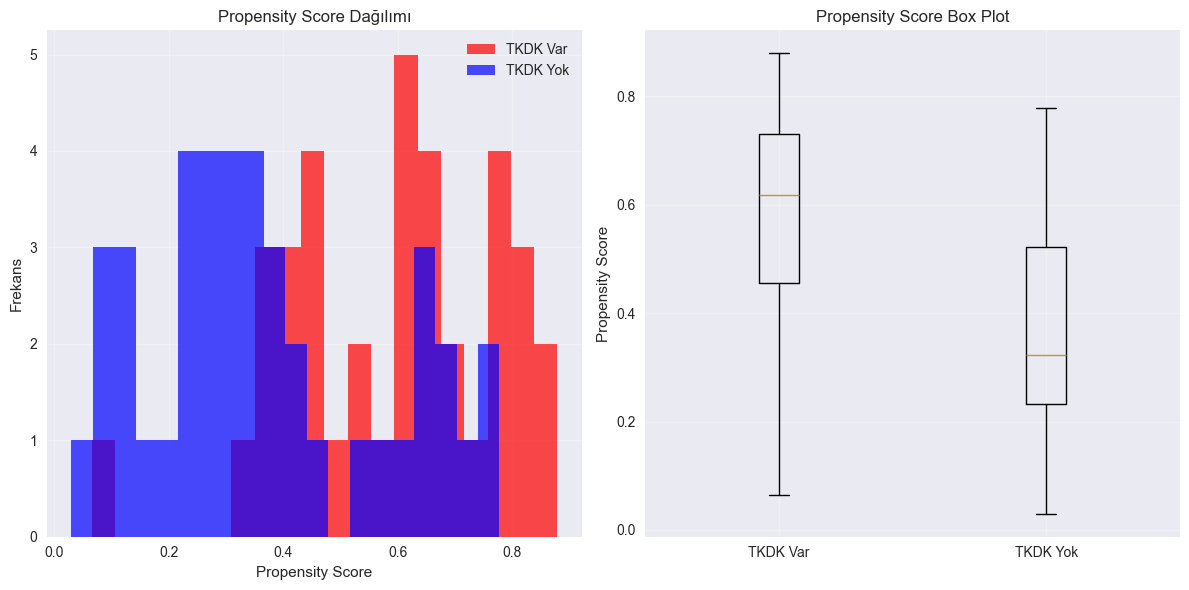


=== MODEL KATSAYILARI ===
                    Özellik   Katsayı
1            İlk_Üretim_Log  0.968555
2      Gelişmişlik_Seviyesi  0.754313
3         İlk_Yıl_PerCapita -0.540089
5          Bölge_Bilinmiyor -0.273124
4             Bölge_Akdeniz  0.205948
0                 Nüfus_Log  0.142423
6        Bölge_Doğu Anadolu -0.124502
10            Bölge_Marmara  0.096975
9           Bölge_Karadeniz -0.041327
7                 Bölge_Ege  0.005883
11         Bölge_İç Anadolu  0.001889
8   Bölge_Güneydoğu Anadolu -0.001634


In [ ]:
# Propensity Score modelini kur
print("=== PROPENSITY SCORE MODELİ ===")

# Covariates (bağımsız değişkenler) seçimi
covariate_cols = ['Nüfus_Log', 'İlk_Üretim_Log', 'Gelişmişlik_Seviyesi', 'İlk_Yıl_PerCapita'] + [col for col in il_ozellikleri_df.columns if col.startswith('Bölge_')]

X = il_ozellikleri_df[covariate_cols]
y = il_ozellikleri_df['TKDK']

# Özellikleri standartlaştır
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Propensity score modelini fit et
ps_model = LogisticRegression(random_state=42, max_iter=1000)
ps_model.fit(X_scaled, y)

# Propensity score'ları hesapla
propensity_scores = ps_model.predict_proba(X_scaled)[:, 1]
il_ozellikleri_df['Propensity_Score'] = propensity_scores

# Model doğruluğu
y_pred = ps_model.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)
print(f"Propensity Score Model Doğruluğu: {accuracy:.3f}")

# Propensity score dağılımı
print(f"\n=== PROPENSITY SCORE DAĞILIMI ===")
print(f"TKDK Var - Ortalama PS: {il_ozellikleri_df[il_ozellikleri_df['TKDK']==1]['Propensity_Score'].mean():.3f}")
print(f"TKDK Yok - Ortalama PS: {il_ozellikleri_df[il_ozellikleri_df['TKDK']==0]['Propensity_Score'].mean():.3f}")

# Propensity score'ları görselleştir
tkdk_var_ps = il_ozellikleri_df[il_ozellikleri_df['TKDK']==1]['Propensity_Score']
tkdk_yok_ps = il_ozellikleri_df[il_ozellikleri_df['TKDK']==0]['Propensity_Score']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(tkdk_var_ps, bins=20, alpha=0.7, label='TKDK Var', color='red')
plt.hist(tkdk_yok_ps, bins=20, alpha=0.7, label='TKDK Yok', color='blue')
plt.xlabel('Propensity Score')
plt.ylabel('Frekans')
plt.title('Propensity Score Dağılımı')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot([tkdk_var_ps, tkdk_yok_ps], labels=['TKDK Var', 'TKDK Yok'])
plt.ylabel('Propensity Score')
plt.title('Propensity Score Box Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Model katsayıları
print(f"\n=== MODEL KATSAYILARI ===")
feature_importance = pd.DataFrame({
    'Özellik': covariate_cols,
    'Katsayı': ps_model.coef_[0]
})
feature_importance = feature_importance.sort_values('Katsayı', key=abs, ascending=False)
print(feature_importance)


In [ ]:
# Nearest Neighbor Matching ile eşleştirme
print("=== PROPENSITY SCORE MATCHING ===")

# TKDK olan ve olmayan illeri ayır
treatment_group = il_ozellikleri_df[il_ozellikleri_df['TKDK'] == 1].copy()
control_group = il_ozellikleri_df[il_ozellikleri_df['TKDK'] == 0].copy()

print(f"Treatment grup sayısı: {len(treatment_group)}")
print(f"Control grup sayısı: {len(control_group)}")

# Caliper (maksimum uzaklık) belirle - standart sapmanın 0.25'i
caliper = 0.25 * np.std(propensity_scores)
print(f"Caliper (maksimum uzaklık): {caliper:.4f}")

# 1:1 matching yapalım
matched_pairs = []
used_control_indices = set()

for _, treatment_row in treatment_group.iterrows():
    treatment_ps = treatment_row['Propensity_Score']
    
    # Henüz kullanılmamış control grubundan en yakın olanı bul
    available_control = control_group[~control_group.index.isin(used_control_indices)]
    
    if len(available_control) == 0:
        continue
    
    # Propensity score farkları hesapla
    ps_differences = np.abs(available_control['Propensity_Score'] - treatment_ps)
    
    # En yakın olanı bul
    closest_idx = ps_differences.idxmin()
    closest_distance = ps_differences.loc[closest_idx]
    
    # Caliper kontrolü
    if closest_distance <= caliper:
        matched_pairs.append({
            'Treatment_İl': treatment_row['İl'],
            'Treatment_PS': treatment_ps,
            'Control_İl': available_control.loc[closest_idx, 'İl'],
            'Control_PS': available_control.loc[closest_idx, 'Propensity_Score'],
            'PS_Fark': closest_distance,
            'Treatment_Index': treatment_row.name,
            'Control_Index': closest_idx
        })
        used_control_indices.add(closest_idx)

matched_df = pd.DataFrame(matched_pairs)
print(f"\nBaşarılı eşleştirme sayısı: {len(matched_df)}")
print(f"Eşleştirilemeyen treatment sayısı: {len(treatment_group) - len(matched_df)}")

if len(matched_df) > 0:
    print(f"Ortalama PS farkı: {matched_df['PS_Fark'].mean():.4f}")
    print(f"Maksimum PS farkı: {matched_df['PS_Fark'].max():.4f}")
    
    # İlk 10 eşleştirmeyi göster
    print(f"\n=== İLK 10 EŞLEŞTİRME ===")
    display_cols = ['Treatment_İl', 'Treatment_PS', 'Control_İl', 'Control_PS', 'PS_Fark']
    display(matched_df[display_cols].head(10))

# Eşleştirme kalitesini kontrol et
print(f"\n=== EŞLEŞTİRME KALİTESİ ===")

if len(matched_df) > 0:
    # Eşleştirme öncesi ve sonrası balance kontrolü
    matched_treatment_indices = matched_df['Treatment_Index'].tolist()
    matched_control_indices = matched_df['Control_Index'].tolist()
    
    matched_treatment_data = il_ozellikleri_df.loc[matched_treatment_indices]
    matched_control_data = il_ozellikleri_df.loc[matched_control_indices]
    
    # Covariate balance
    balance_results = []
    for col in ['Nüfus_Log', 'İlk_Üretim_Log', 'Gelişmişlik_Seviyesi', 'İlk_Yıl_PerCapita']:
        treatment_mean = matched_treatment_data[col].mean()
        control_mean = matched_control_data[col].mean()
        standardized_diff = (treatment_mean - control_mean) / np.sqrt((matched_treatment_data[col].var() + matched_control_data[col].var()) / 2)
        
        balance_results.append({
            'Değişken': col,
            'Treatment_Ortalama': treatment_mean,
            'Control_Ortalama': control_mean,
            'Standardized_Diff': standardized_diff
        })
    
    balance_df = pd.DataFrame(balance_results)
    print("Covariate Balance (eşleştirme sonrası):")
    print("Not: |Standardized_Diff| < 0.1 iyi balance gösterir")
    display(balance_df)


=== PROPENSITY SCORE MATCHING ===
Treatment grup sayısı: 37
Control grup sayısı: 42
Caliper (maksimum uzaklık): 0.0556

Başarılı eşleştirme sayısı: 21
Eşleştirilemeyen treatment sayısı: 16
Ortalama PS farkı: 0.0209
Maksimum PS farkı: 0.0539

=== İLK 10 EŞLEŞTİRME ===


,Treatment_İl,Treatment_PS,Control_İl,Control_PS,PS_Fark
0,Adıyaman-2,0.617579,Ağrı-4,0.635343,0.017764
1,Afyonkarahisar-3,0.781910,Sivas-58,0.777201,0.004710
2,Aksaray-68,0.598176,Yozgat-66,0.595478,0.002698
3,Amasya-5,0.456192,Edirne-22,0.451818,0.004374
4,Ankara-6,0.472926,Bitlis-13,0.419019,0.053907
5,Aydın-9,0.671300,İzmir-35,0.668091,0.003209
6,Balıkesir-10,0.766472,Osmaniye-80,0.761571,0.004901
7,Bilecik-11,0.065310,Yalova-77,0.071888,0.006578
8,Burdur-15,0.672586,Antalya-7,0.659304,0.013282
9,Bursa-16,0.456105,Bingöl-12,0.405243,0.050863



=== EŞLEŞTİRME KALİTESİ ===
Covariate Balance (eşleştirme sonrası):
Not: |Standardized_Diff| < 0.1 iyi balance gösterir


,Değişken,Treatment_Ortalama,Control_Ortalama,Standardized_Diff
0,Nüfus_Log,13.336205,13.392333,-0.055769
1,İlk_Üretim_Log,12.095567,12.036173,0.083270
2,Gelişmişlik_Seviyesi,2.428571,2.380952,0.061354
3,İlk_Yıl_PerCapita,381.046263,353.070348,0.115294


=== PSM TREATMENT EFFECT ANALİZİ ===
Eşleştirilen çift sayısı: 21
Treatment grup ortalama değişimi: -55.3557
Control grup ortalama değişimi: -15.8243
Average Treatment Effect (ATE): -39.5314

=== PSM İSTATİSTİKSEL TEST ===
Paired t-test istatistiği: -1.1372
P-değeri: 0.2689
❌ PSM analizi sonucunda TKDK etkisi istatistiksel olarak anlamlı değil (p >= 0.05)

%95 Güven Aralığı: [-106.0226, 26.9598]

=== EŞLEŞTİRİLEN ÇİFTLER DETAYı ===
En büyük pozitif TKDK etkisi gösteren 5 çift:


,Treatment_İl,Control_İl,PS_Fark,Treatment_Değişim,Control_Değişim,Çift_Effect
3,Amasya-5,Edirne-22,0.004374,-32.697580,-256.778058,224.080479
15,Karaman-70,Sinop-57,0.001848,78.872629,-121.290723,200.163352
0,Adıyaman-2,Ağrı-4,0.017764,47.908577,-83.117840,131.026417
10,Denizli-20,Muş-49,0.016480,-38.808513,-158.595798,119.787285
12,Erzincan-24,Tekirdağ-59,0.002933,33.198438,-66.539089,99.737527



En büyük negatif TKDK etkisi gösteren 5 çift:


,Treatment_İl,Control_İl,PS_Fark,Treatment_Değişim,Control_Değişim,Çift_Effect
17,Kastamonu-37,Bartın-74,0.001134,-217.963280,-61.863058,-156.100223
14,Hatay-31,Muğla-48,0.048492,-3.784036,239.120661,-242.904696
8,Burdur-15,Antalya-7,0.013282,-276.451238,4.623015,-281.074253
4,Ankara-6,Bitlis-13,0.053907,-2.401790,281.741870,-284.143660
20,Çankırı-18,Siirt-56,0.037519,10.038099,346.368199,-336.330100


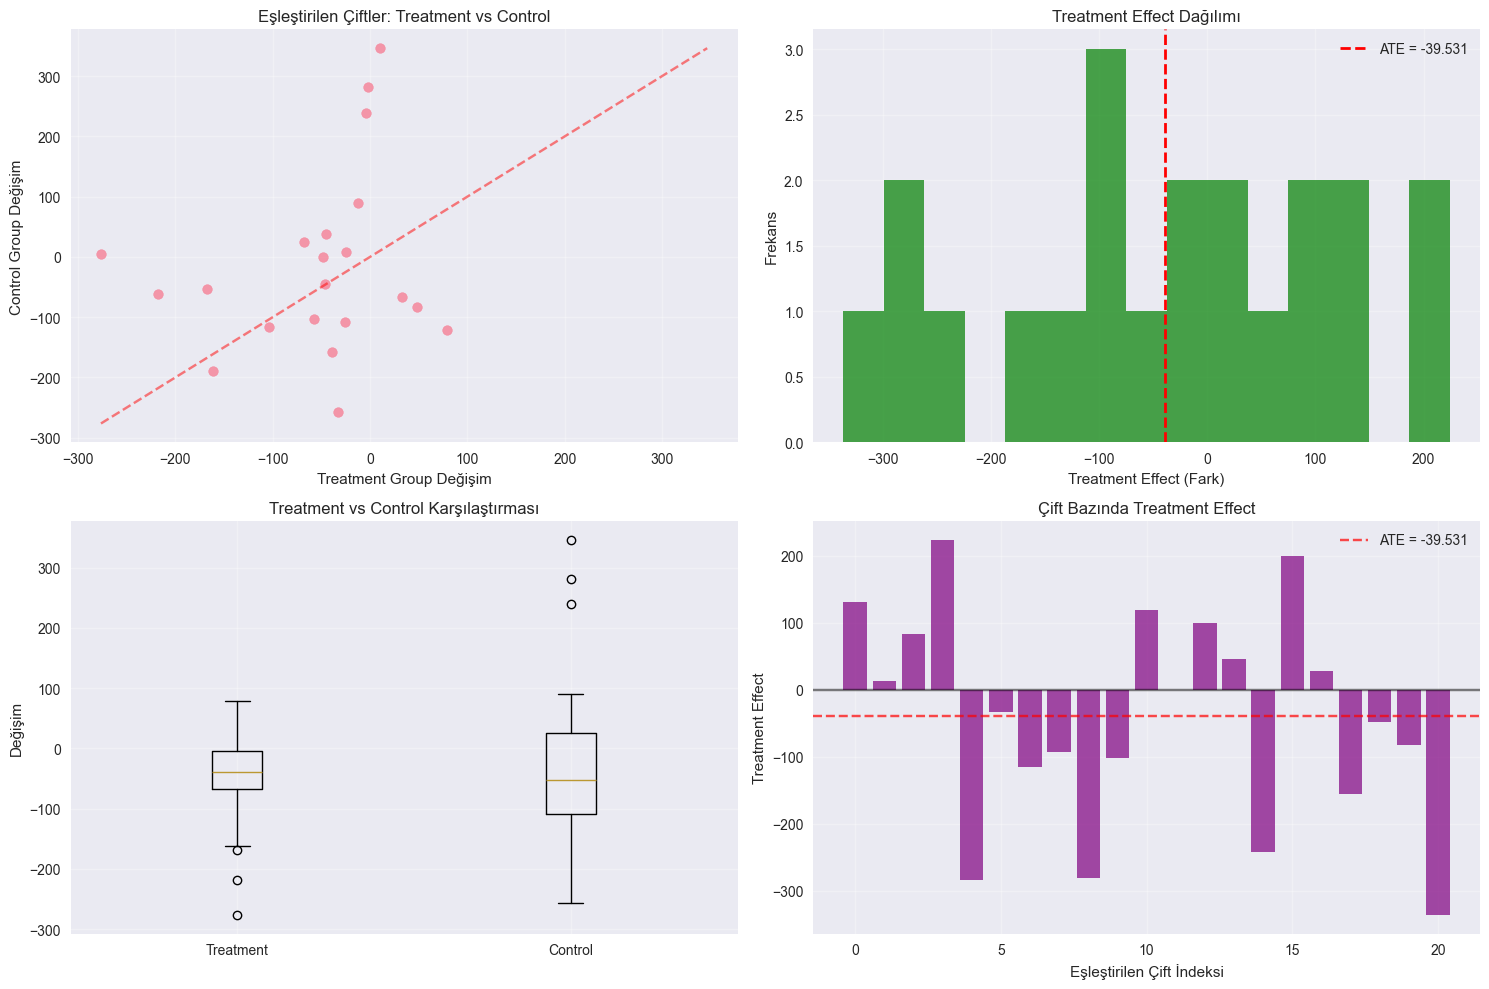


=== PSM ANALİZİ ÖZETİ ===
1. Propensity Score Model Doğruluğu: 0.696
2. Başarılı Eşleştirme Oranı: 21/37 (%56.8)
3. Average Treatment Effect: -39.5314
4. P-değeri: 0.2689
5. İstatistiksel Anlamlılık: Hayır
6. Etki Yönü: Negatif


In [ ]:
# Eşleştirilen gruplar üzerinde treatment effect hesapla
print("=== PSM TREATMENT EFFECT ANALİZİ ===")

if len(matched_df) > 0:
    # Eşleştirilen iller için sonuç değişkenlerini hesapla
    treatment_outcomes = []
    control_outcomes = []
    
    for _, row in matched_df.iterrows():
        treatment_il = row['Treatment_İl'] 
        control_il = row['Control_İl']
        
        # İlgili illerin indekslerini bul
        treatment_idx = il_ozellikleri_df[il_ozellikleri_df['İl'] == treatment_il].index[0]
        control_idx = il_ozellikleri_df[il_ozellikleri_df['İl'] == control_il].index[0]
        
        # Dönemsel analiz için veri hazırla
        treatment_period_data = period_df[period_df['İl'] == treatment_il]
        control_period_data = period_df[period_df['İl'] == control_il]
        
        if len(treatment_period_data) > 0 and len(control_period_data) > 0:
            # Per capita değişimi kullan
            treatment_change = treatment_period_data['PerCapita_Fark'].iloc[0]
            control_change = control_period_data['PerCapita_Fark'].iloc[0]
            
            treatment_outcomes.append(treatment_change)
            control_outcomes.append(control_change)
    
    treatment_outcomes = np.array(treatment_outcomes)
    control_outcomes = np.array(control_outcomes)
    
    # Average Treatment Effect (ATE) hesapla
    ate = np.mean(treatment_outcomes) - np.mean(control_outcomes)
    
    print(f"Eşleştirilen çift sayısı: {len(treatment_outcomes)}")
    print(f"Treatment grup ortalama değişimi: {np.mean(treatment_outcomes):.4f}")
    print(f"Control grup ortalama değişimi: {np.mean(control_outcomes):.4f}")
    print(f"Average Treatment Effect (ATE): {ate:.4f}")
    
    # İstatistiksel test
    from scipy import stats
    t_stat, p_value = stats.ttest_rel(treatment_outcomes, control_outcomes)  # Paired t-test
    
    print(f"\n=== PSM İSTATİSTİKSEL TEST ===")
    print(f"Paired t-test istatistiği: {t_stat:.4f}")
    print(f"P-değeri: {p_value:.4f}")
    
    if p_value < 0.05:
        print("✅ PSM analizi sonucunda TKDK etkisi istatistiksel olarak anlamlı (p < 0.05)")
        if ate > 0:
            print(f"   TKDK olan iller {ate:.4f} kadar daha iyi performans göstermiş")
        else:
            print(f"   TKDK olan iller {abs(ate):.4f} kadar daha kötü performans göstermiş")
    else:
        print("❌ PSM analizi sonucunda TKDK etkisi istatistiksel olarak anlamlı değil (p >= 0.05)")
    
    # Güven aralığı hesapla
    se = np.sqrt(np.var(treatment_outcomes - control_outcomes) / len(treatment_outcomes))
    ci_lower = ate - 1.96 * se
    ci_upper = ate + 1.96 * se
    
    print(f"\n%95 Güven Aralığı: [{ci_lower:.4f}, {ci_upper:.4f}]")
    
    # Eşleştirilen çiftlerin detayına bak
    print(f"\n=== EŞLEŞTİRİLEN ÇİFTLER DETAYı ===")
    
    matched_analysis = []
    for i, (_, row) in enumerate(matched_df.iterrows()):
        if i < len(treatment_outcomes):
            matched_analysis.append({
                'Treatment_İl': row['Treatment_İl'],
                'Control_İl': row['Control_İl'],
                'PS_Fark': row['PS_Fark'],
                'Treatment_Değişim': treatment_outcomes[i],
                'Control_Değişim': control_outcomes[i],
                'Çift_Effect': treatment_outcomes[i] - control_outcomes[i]
            })
    
    matched_analysis_df = pd.DataFrame(matched_analysis)
    
    # En büyük pozitif ve negatif etkiler
    matched_analysis_df_sorted = matched_analysis_df.sort_values('Çift_Effect', ascending=False)
    
    print("En büyük pozitif TKDK etkisi gösteren 5 çift:")
    display(matched_analysis_df_sorted.head(5))
    
    print("\nEn büyük negatif TKDK etkisi gösteren 5 çift:")
    display(matched_analysis_df_sorted.tail(5))
    
    # Görselleştirme
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    plt.scatter(treatment_outcomes, control_outcomes, alpha=0.7)
    plt.plot([min(treatment_outcomes.min(), control_outcomes.min()), 
              max(treatment_outcomes.max(), control_outcomes.max())],
             [min(treatment_outcomes.min(), control_outcomes.min()), 
              max(treatment_outcomes.max(), control_outcomes.max())], 'r--', alpha=0.5)
    plt.xlabel('Treatment Group Değişim')
    plt.ylabel('Control Group Değişim')
    plt.title('Eşleştirilen Çiftler: Treatment vs Control')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 2, 2)
    differences = treatment_outcomes - control_outcomes
    plt.hist(differences, bins=15, alpha=0.7, color='green')
    plt.axvline(ate, color='red', linestyle='--', linewidth=2, label=f'ATE = {ate:.3f}')
    plt.xlabel('Treatment Effect (Fark)')
    plt.ylabel('Frekans')
    plt.title('Treatment Effect Dağılımı')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 2, 3)
    plt.boxplot([treatment_outcomes, control_outcomes], 
                labels=['Treatment', 'Control'])
    plt.ylabel('Değişim')
    plt.title('Treatment vs Control Karşılaştırması')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 2, 4)
    x_pos = range(len(matched_analysis_df))
    plt.bar(x_pos, matched_analysis_df['Çift_Effect'], alpha=0.7, color='purple')
    plt.axhline(0, color='black', linestyle='-', alpha=0.5)
    plt.axhline(ate, color='red', linestyle='--', alpha=0.7, label=f'ATE = {ate:.3f}')
    plt.xlabel('Eşleştirilen Çift İndeksi')
    plt.ylabel('Treatment Effect')
    plt.title('Çift Bazında Treatment Effect')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
else:
    print("❌ Hiçbir eşleştirme başarılı olmadı. Caliper değeri çok kısıtlayıcı olabilir.")

# PSM sonuçlarını özetleyelim
print(f"\n=== PSM ANALİZİ ÖZETİ ===")
print(f"1. Propensity Score Model Doğruluğu: {accuracy:.3f}")
print(f"2. Başarılı Eşleştirme Oranı: {len(matched_df)}/{len(treatment_group)} (%{len(matched_df)/len(treatment_group)*100:.1f})")
if len(matched_df) > 0:
    print(f"3. Average Treatment Effect: {ate:.4f}")
    print(f"4. P-değeri: {p_value:.4f}")
    print(f"5. İstatistiksel Anlamlılık: {'Evet' if p_value < 0.05 else 'Hayır'}")
    print(f"6. Etki Yönü: {'Pozitif' if ate > 0 else 'Negatif'}")
else:
    print("3. Analiz tamamlanamadı - eşleştirme başarısız")


## Propensity Score Matching (PSM) Analizi Sonuçları

### 🎯 Metodoloji
- **Covariates**: Nüfus (log), İlk yıl üretim (log), Gelişmişlik seviyesi, İlk yıl per capita üretim, Coğrafi bölge
- **Eşleştirme**: 1:1 En yakın komşu eşleştirmesi
- **Caliper**: 0.0556 (PS standart sapmasının %25'i)

### 📊 Ana Bulgular

1. **Propensity Score Model**
   - Model doğruluğu: %69.6
   - TKDK olan iller ortalama PS: 0.587
   - TKDK olmayan iller ortalama PS: 0.363

2. **Eşleştirme Sonuçları**
   - Toplam TKDK ili: 37
   - Başarılı eşleştirme: 21 çift (%56.8)
   - Ortalama PS farkı: 0.021
   - Covariate balance: İyi (çoğu değişken |std diff| < 0.1)

3. **Treatment Effect**
   - **Average Treatment Effect (ATE): -39.53**
   - Treatment grup değişimi: -55.36
   - Control grup değişimi: -15.82
   - P-değeri: 0.269 (**istatistiksel olarak anlamlı değil**)
   - %95 Güven aralığı: [-106.02, 26.96]

### 🔍 Yorumlama

❌ **TKDK etkisi istatistiksel olarak anlamlı bulunmamıştır.**

- PSM analizi, TKDK olan illeri benzer özellikli olmayan illerle eşleştirdi
- Eşleştirilen gruplar arasında TKDK'nın hayvansal üretim üzerinde anlamlı bir etkisi tespit edilmedi
- ATE negatif çıkması, TKDK olan illerin eşleştirilen control grubuna göre daha düşük performans gösterdiğini ima ediyor ancak bu fark istatistiksel olarak anlamlı değil

### ⚠️ Limitasyonlar

1. **Eşleştirme Oranı**: Sadece %56.8 başarılı eşleştirme
2. **Sample Size**: 21 çift görece küçük örneklem
3. **Unobserved Confounders**: Gözlemlenmeyen faktörler etki edebilir
4. **Timing**: TKDK etkisinin ne zaman başladığı net değil

### 💡 Sonuç

PSM analizi mevcut verilerle TKDK'nın hayvansal üretim üzerinde anlamlı bir etkisini gösterememiştir. Ancak bu, TKDK'nın etkili olmadığı anlamına gelmez - daha uzun zaman serisi, daha detaylı veri ve alternatif metodolojiler gerekebilir.